## Описание проекта  ##

Начиная с 2020 года туристические потоки россиян стали заметно трансформироваться. Всёбольше людей отдают предпочтение внутреннему туризму. Развивается инфраструктура –как туристическая, так и транспортная. Сезонность и величина размаха трафика задают новые требования к развитию сетей связи не только в мегаполисах, но и в небольших городах, привлекающих туристов своими красотами и инфраструктурой. Мобильный оператор, который первым оценит перспективы этой ситуации, может обеспечить себе преимущество на ранних этапах развития региона за счет привлечения абонентов через улучшение покрытия и качества связей для разных категорийпотребителей.

**Задача команды**. Оценить перспективы развития туристической
отрасли городов России с точки зрения связи и разработать
локальные стратегии развития для наиболее интересных локаций
из предлагаемых для анализа. Предлагаемая стратегия развития должна обеспечивать
привлечение 10000 новых абонентов до конца 2024 г

**Задача 1.** Команде необходимо проанализировать данные по туристическому трафику в 36 целевых городах -как открытые,так и предоставленные МегаФоном, –иразработать прогностическую модель динамикитуристического трафика.Затем определить наиболее перспективные города с точки зрения роста туристического потока и наибольшеговремени пребывания туристов на территории. Следует учитывать не только линейные тренды, но и планируемыесобытия.

**Задача 2.** Получив список перспективных городов,
следует проанализировать качество связи МФ и
конкурентов и кластеризовать города по этому признаку.
Соотношение уровня развития инфраструктуры и качества
связи позволяет однозначно определить тип стратегии,
применимый к этой территории:

* A) Сеть МегаФона качественно хороша, сеть конкурентов
нет стратегия «Привлечение без стройки»
* B) Сеть МегаФона требует развития, сеть конкурентов
качественно хороша стратегия «Стройка
без привлечения»
* C) Сеть МегаФона качественно хороша, у конкурентов
тоже территория отсеивается
* D) B сеть МегаФона, и сеть конкурентов требует
развития стратегия «Стройка, затем привлечение»

**Задача 3.** Разработать
детальную локальную стратегию развития
присутствия МегаФона в городах кластеров A и D:

* A) Продуктовое предложение какие тарифы, сервисы и
услуги должны предлагаться абонентам туристам? Какие
из них уже существуют, а какие должны быть разработаны?
* B) Предложение по организации дистрибуции как
должна измениться дистрибуция (в том числе
карта салонов и зон доставки продуктов, сервисов и
услуг)?
* C) Предложение по продвижению продуктов и услуг
какие действия следует предпринять для информирования
как текущих, так и новых абонентов о продуктах, сервисах и
услугах МегаФона?
* D) Предложения по развитию инфраструктуры как
должна измениться инфраструктура?

**Задача 4.** По каждому пункту команда должна представитьплан действий,план расходовиописание эффектовот каждогопредлагаемого действия.

**Структура данных**

В каждом
csv файле одна и та же структура, ниже описание переменных:

* Snap_date
дата начала месяца туризма

* Id_hash
id абонента. Один абонент может встречаться несколько раз в разных месяцах или
городах

* days
продолжительность присутствия в днях в точке туризма

* home_region
номер домашнего региона

* city
точка туризма

* gender
предсказанный моделью пол абонента

* age
предсказанный моделью возраст абонента в годах

* mou
голосовой трафик абонента за месяц ( snap_date ) в минутах

* mou_out
исходящий голосовой трафик абонента за месяц в минутах

* dou
интернет трфик абонента за месяц, МБ

* Interests
список интересов абонента за месяц snap_date

* top_service
url , по которому у абонента больше всего трафика за месяц

* volume_sum
трафик абонента за время присутствия в точке туризма, МБ

* dl
ul_volume_sum разложение volume_sum на uplink , downlink , МБ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path_2021 = 'Data_2021'
file_list_2021 = os.listdir(file_path_2021)
file_list_2021 = [city.replace('Tourists','Data_2021/Tourists') for city in file_list_2021]
file_list_2021.remove('.ipynb_checkpoints')

file_path_2022 = 'Data_2022'
file_list_2022 = os.listdir(file_path_2022)
file_list_2022 = [city.replace('Tourists','Data_2022/Tourists') for city in file_list_2022]

In [3]:
df_append_2021 = pd.DataFrame()
df_append_2022 = pd.DataFrame()
#append all files together
for file in file_list_2021:
    df_temp = pd.read_csv(file)
    df_append_2021 = df_append_2021.append(df_temp, ignore_index=True)
    
for file in file_list_2022:
    df_temp = pd.read_csv(file)
    df_append_2022 = df_append_2022.append(df_temp, ignore_index=True)

df_append_2022

Unnamed: 0   snap_date                           id_hash  days  \
0                 0  2022.08.01  2fa7cd4cb7ab5f67f0c34d4f54b3455b     7   
1                 1  2022.08.01  699fbcb8aac331a44f42ec53c3bc1771     8   
2                 2  2022.08.01  fc4061f6a486e1e0f2ceecd2c0551168    12   
3                 3  2022.08.01  d9a6addc749c57d5d95f54ef0157d8d9     9   
4                 4  2022.08.01  85ddcc5e113bb26c19b98d56c4154201     7   
...             ...         ...                               ...   ...   
3818875       20463  2022.12.01  c0b834bfbe8e15eba36435a0ce4efce3     9   
3818876       20464  2022.12.01  5075dfadc2d26829cbcd57efee491a41     7   
3818877       20465  2022.12.01  9f234963e685808fc25f183d43287683     1   
3818878       20466  2022.12.01  c0b90318610a00d8e710a9e80c96b9cb    15   
3818879       20467  2022.12.01  21021025e6daaafd2b68a9f147fbb2bf    19   

         home_region  tourists_region            city  gender  age  \
0                  9               23          Абинск       2   51   
1                  3               23          Абинск       2   31   
2                 43               23          Абинск       1   48   
3                 63               23          Абинск       2   40   
4                 61               23          Абинск       3   39   
...              ...              ...             ...     ...  ...   
3818875           37               33  Юрьев-Польский       1   32   
3818876           77               33  Юрьев-Польский       1   41   
3818877           52               33  Юрьев-Польский       1   36   
3818878           37               33  Юрьев-Польский       1   27   
3818879           37               33  Юрьев-Польский       1   26   

                 mou     mou_out          dou  \
0         494.322480  298.847500   7932.82470   
1         329.349980  206.412490   2366.39140   
2         334.232500  132.650010   2604.36820   
3         171.045000  142.135010   1827.84390   
4         367.395000  224.630000  31482.02700   
...              ...         ...          ...   
3818875  1503.110000  799.365000   7869.65040   
3818876  1500.380000  693.490000  10923.86700   
3818877   948.920000  705.635000   8897.45100   
3818878     4.742499    4.742499    953.58044   
3818879    50.452500   25.532500   2657.19630   

                                                 interests   top_service  \
0        [Контент на тему путешествий, Email-клиенты, П...    [existing]   
1        [Активный отдых, Контент на тему путешествий, ...  [unknowntcp]   
2        [Программное обеспечение, Активный отдых, Моби...         [dns]   
3        [Кулинария и рецепты, Новости и СМИ, Образован...     [youtube]   
4        [Навигация, Активный отдых, Мессенджеры и чаты...    [existing]   
...                                                    ...           ...   
3818875  [Программное обеспечение, Фитнес, бег и здоров...         [dns]   
3818876  [Государственный информационный портал, Банки,...      [yandex]   
3818877       [Навигация, Новости и СМИ, Боевые искусства]      [google]   
3818878  [Автозапчасти,автотовары, Общественный транспо...      [google]   
3818879  [Навигация, Покупка авто, Программное обеспече...      [yandex]   

           volume_sum  dl_volume_sum  ul_volume_sum  
0        2.779278e+09   2.378326e+09   4.009526e+08  
1        3.199224e+09   2.500532e+09   6.986923e+08  
2        9.823515e+08   9.017218e+08   8.062974e+07  
3        5.062598e+08   4.584678e+08   4.779204e+07  
4        4.833227e+10   4.569014e+10   2.642137e+09  
...               ...            ...            ...  
3818875  3.651156e+07   2.125558e+07   1.525598e+07  
3818876  1.745375e+08   1.042098e+08   7.032774e+07  
3818877  7.950318e+07   6.346635e+07   1.603684e+07  
3818878  9.392589e+07   6.859338e+07   2.533251e+07  
3818879  6.675412e+07   4.188577e+07   2.486835e+07  

[3818880 rows x 17 columns]

In [4]:
df_append_2021.describe().round(2)

Unnamed: 0        days  home_region  tourists_region      gender  \
count  3884691.00  3884691.00   3884691.00       3884691.00  3884691.00   
mean    107686.87        7.13        52.15            24.71        1.63   
std     104479.40        5.15        23.17             4.93        0.67   
min          0.00        1.00        -1.00             4.00        1.00   
25%      28603.00        3.00        34.00            23.00        1.00   
50%      70558.00        7.00        59.00            23.00        2.00   
75%     159059.50       10.00        77.00            23.00        2.00   
max     462832.00       49.00        89.00            38.00        3.00   

              age         mou     mou_out         dou  
count  3884691.00  3720623.00  3455256.00  3293619.00  
mean        36.13      502.13      287.13    15301.04  
std         13.51      583.48      346.99    24329.85  
min      -5964.00        3.17        3.17        3.15  
25%         30.00       94.52       56.00     1902.92  
50%         36.00      319.73      177.73     6996.63  
75%         44.00      699.58      390.32    18920.20  
max       1829.00    24229.43    18125.56  1274283.80

In [5]:
df_append_2021[(df_append_2021.age > 90) | (df_append_2021.age < 1)]

Unnamed: 0   snap_date                           id_hash  days  \
32               32  2021.07.01  0f4d33f218fa4bb478e5443eee8a30d3     9   
127             127  2021.07.01  e53e75589e9b172b989e89a4d3fa49fb     7   
165             165  2021.07.01  936b65257a3bddec088db3a0fab0726b     9   
186             186  2021.07.01  e871d809866020e49616b23f48819c69     7   
233             233  2021.07.01  2635fb5e892d0b71374ad273ced52073     6   
...             ...         ...                               ...   ...   
3884612       15163  2021.12.01  0ac0806111b11671068e77bbacd2138e     6   
3884651       15202  2021.12.01  7369a2b6bab82d479b9e2772b5fc8477     2   
3884666       15217  2021.12.01  2050382cb57f02895af66329a9089964     7   
3884689       15240  2021.12.01  c73a6b4d10fbd4cdab000c29b538793d     2   
3884690       15241  2021.12.01  16c476b180d1cf663862b9ba83cd6a94     4   

         home_region  tourists_region            city  gender  age  \
32                77               23          Абинск       3    0   
127               46               23          Абинск       3    0   
165               56               23          Абинск       3    0   
186               56               23          Абинск       3    0   
233                2               23          Абинск       3    0   
...              ...              ...             ...     ...  ...   
3884612           37               33  Юрьев-Польский       3    0   
3884651           37               33  Юрьев-Польский       3    0   
3884666           77               33  Юрьев-Польский       3    0   
3884689           61               33  Юрьев-Польский       3    0   
3884690           77               33  Юрьев-Польский       3    0   

                mou     mou_out          dou  
32         4.427500    4.427500   3378.19650  
127       62.579998   56.805000   4638.10100  
165       48.930004   43.732502  14577.82100  
186      430.535000  342.702480   3168.59230  
233       69.265000   31.342499   4006.80200  
...             ...         ...          ...  
3884612  945.297500  653.940000  21556.12900  
3884651   47.967503   17.727500   2113.81300  
3884666  191.730010   76.545000      6.47124  
3884689  964.459960  462.315000    444.64526  
3884690  300.720000  138.127500   8117.86300  

[176338 rows x 12 columns]

In [6]:
print('Shape: ',df_append_2021.shape)
(df_append_2021.isna().sum() / len(df_append_2021)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

Shape:  (3884691, 12)


In [7]:
df_append_2022.shape

(3818880, 17)

In [7]:
df_append_2022.describe().round(2)

Unnamed: 0        days  home_region  tourists_region      gender  \
count  3818880.00  3818880.00   3818880.00       3818880.00  3818880.00   
mean    105307.54        7.03        52.23            24.53        1.74   
std      98966.31        5.02        23.41             4.92        0.75   
min          0.00        1.00        -1.00             4.00        1.00   
25%      27925.00        3.00        34.00            23.00        1.00   
50%      69664.00        7.00        61.00            23.00        2.00   
75%     159256.00       10.00        77.00            23.00        2.00   
max     416713.00       48.00        89.00            38.00        3.00   

              age         mou     mou_out         dou    volume_sum  \
count  3818880.00  3640210.00  3373697.00  3267219.00  3.215639e+06   
mean        32.15      471.85      271.55    16751.04  4.651961e+09   
std         15.27      557.27      332.34    26268.37  1.108276e+10   
min          0.00        3.17        3.17        3.15  3.360000e+01   
25%         26.00       84.54       51.48     2250.68  2.012421e+08   
50%         34.00      294.52      165.18     8023.79  1.153883e+09   
75%         41.00      656.62      367.76    20755.20  4.721527e+09   
max        122.00    28767.46    10208.48  1545581.10  1.380042e+12   

       dl_volume_sum  ul_volume_sum  
count   3.214204e+06   3.182433e+06  
mean    4.238401e+09   4.197857e+08  
std     1.036633e+10   1.630727e+09  
min     3.360000e+01   4.515000e+01  
25%     1.599831e+08   2.692120e+07  
50%     9.907131e+08   1.262982e+08  
75%     4.189512e+09   4.218594e+08  
max     1.357388e+12   5.072520e+11

In [8]:
print('Shape: ',df_append_2022.shape)
(df_append_2022.isna().sum() / len(df_append_2022)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

Shape:  (3818880, 17)


In [9]:
x = ['Муром','Кореновск','Сортавала', 'Юрьев-Польский', 'Абинск', 'Меленки']

In [10]:
df_append_2021[df_append_2021['city'].isin(x)]
#482507 rows 
df_append_2021[df_append_2021['city'].isin(x)]['id_hash'].nunique()
#376050 rows - 0.7793669314642068

376050

In [11]:
466765/520296

0.8971143349170472

In [12]:
df_append_2022[df_append_2022['city'].isin(x)]
#520296 rows  
df_append_2022[df_append_2022['city'].isin(x)]['id_hash'].nunique()
#466765 rows - 0.8971143349170472

466765

# Insights

In [14]:
#Можно взять данные с расстоянниями разных регионов друг от друга, чтобы понять насколько сильно это влияет на выбор города

In [15]:
df_num_2021 = df_append_2021[['days','home_region','tourists_region','gender', 'age', 'mou', 'mou_out', 'dou']]
df_cat_2021 = df_append_2021[['city']]

df_num_2022 = df_append_2022[['days','home_region','tourists_region','gender','age', 'mou', 'mou_out', 'dou']]
df_cat_2022 = df_append_2022[['city', 'interests']]

# 2021

In [16]:
print('Регион и количество посещений(2021)')
df_append_2021['tourists_region'].value_counts()

Регион и количество посещений(2021)


23    3032152
33     730852
4       50739
38      43825
10      27123
Name: tourists_region, dtype: int64

Text(0.5, 0, 'Кол-во посещений')

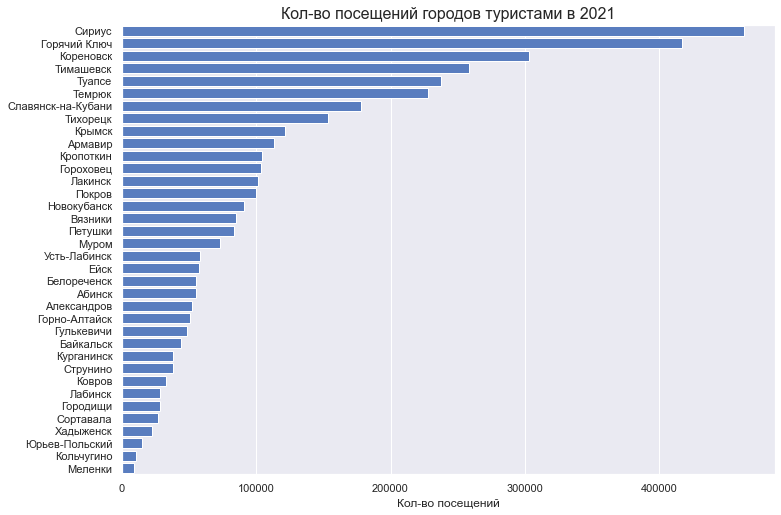

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_color_codes("muted")
sns.barplot(x = df_append_2021['city'].value_counts(), y = df_append_2021['city'].value_counts().index, orient='h', color="b")
#add plot title
plt.title('Кол-во посещений городов туристами в 2021', fontsize=16)
#add axis labels
plt.xlabel('Кол-во посещений')

Text(0.5, 0, 'Кол-во посещений')

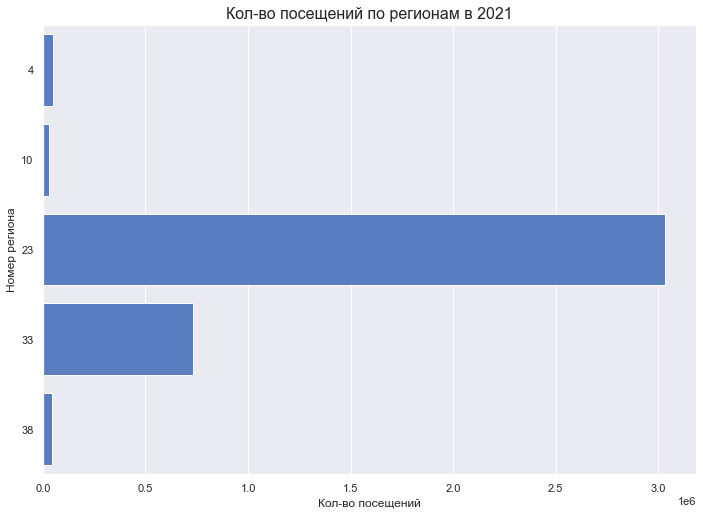

In [18]:
sns.set_color_codes("muted")
sns.barplot(x = df_append_2021['tourists_region'].value_counts(), y = df_append_2021['tourists_region'].value_counts().index, orient='h', color="b")
#add plot title
plt.title('Кол-во посещений по регионам в 2021', fontsize=16)
#add axis labels
plt.ylabel('Номер региона')
plt.xlabel('Кол-во посещений')

In [19]:
df_append_2021[df_append_2021['tourists_region'] == 10]['city'].value_counts()

Сортавала    27123
Name: city, dtype: int64

In [20]:
print('Рейтинг домашних регионов(2021); количество туристов из каждого региона')
df_append_2021['home_region'].value_counts().head(35)

Рейтинг домашних регионов(2021); количество туристов из каждого региона


77    737713
52    278819
61    267659
78    223183
63    181586
26    148428
34    115205
64    102447
36     99995
37     69863
2      68891
16     66064
35     60147
58     59972
21     59134
56     57813
66     53177
9      53016
7      49814
31     49233
73     44460
29     43328
30     42514
43     41190
71     40322
76     38684
48     37029
62     36407
20     35716
15     35170
74     31893
13     31313
86     31254
46     30557
33     30205
Name: home_region, dtype: int64

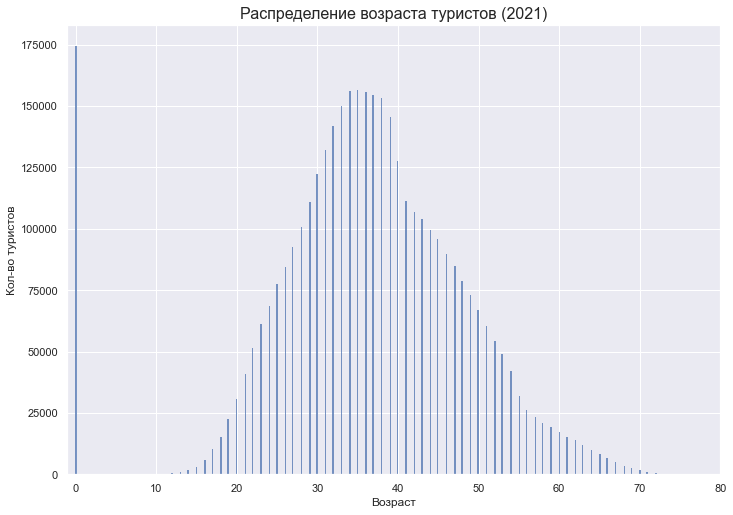

In [21]:
fig, ax = plt.subplots()
sns.histplot(df_append_2021.age, ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(-1,80)
#ax.set_xticks(range(1,32))
plt.title('Распределение возраста туристов (2021)', fontsize=16)
#add axis labels
plt.ylabel('Кол-во туристов')
plt.xlabel('Возраст')
plt.show()

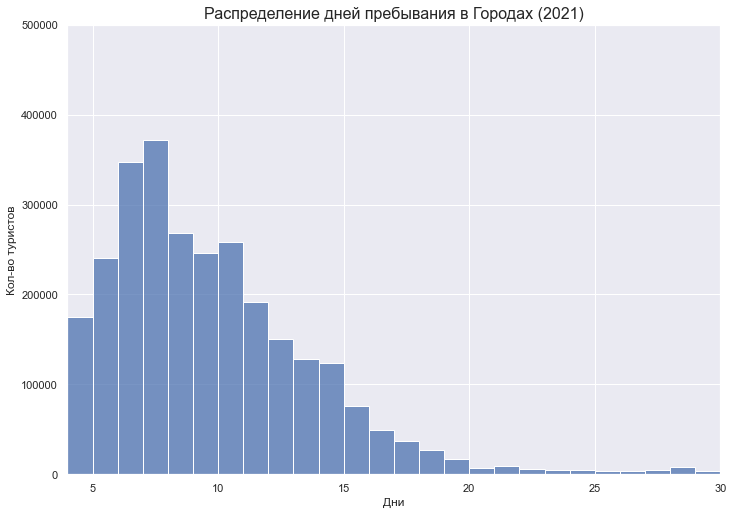

In [22]:
fig, ax = plt.subplots()
sns.histplot(df_append_2021.days, ax=ax, binwidth=1)  # distplot is deprecate and replaced by histplot
ax.set_xlim(4,30)
ax.set_ylim(0,500000)
#ax.set_xticks(range(1,32))
plt.title('Распределение дней пребывания в Городах (2021)', fontsize=16)
#add axis labels
plt.ylabel('Кол-во туристов')
plt.xlabel('Дни')
plt.show()

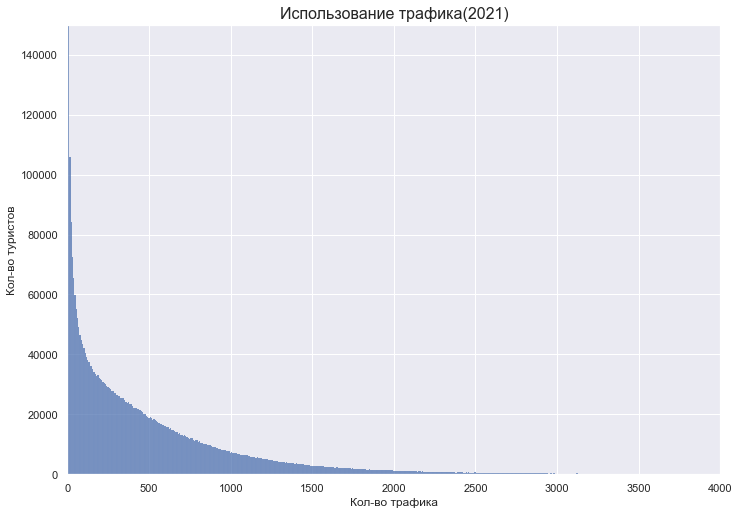

In [23]:
fig, ax = plt.subplots()
sns.histplot(df_append_2021.mou, ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(0,4000)
ax.set_ylim(0,150000)
#ax.set_xticks(range(1,32))
plt.title('Использование трафика(2021)', fontsize=16)
#add axis labels
plt.ylabel('Кол-во туристов')
plt.xlabel('Кол-во трафика')
plt.show()

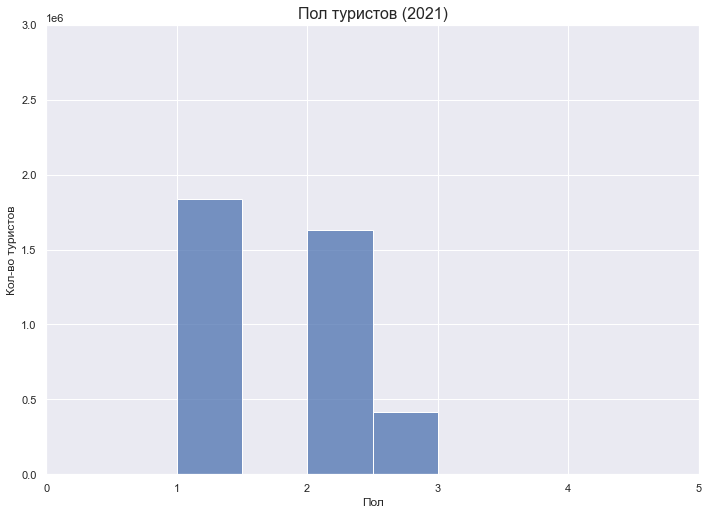

In [24]:
fig, ax = plt.subplots()
sns.histplot(df_append_2021.gender, ax=ax, binwidth=0.5)  # distplot is deprecate and replaced by histplot
ax.set_xlim(0,5)
ax.set_ylim(0,3000000)
#ax.set_xticks(range(1,32))
plt.title('Пол туристов (2021)', fontsize=16)
#add axis labels
plt.ylabel('Кол-во туристов')
plt.xlabel('Пол')
plt.show()

# 2022

In [25]:
df_append_2022['city'].value_counts().head(36)

Горячий Ключ          416714
Сириус                401784
Кореновск             332327
Туапсе                258794
Тимашевск             254749
Темрюк                213835
Славянск-на-Кубани    191311
Тихорецк              155372
Крымск                141579
Армавир               119371
Кропоткин             105492
Гороховец              91670
Покров                 90861
Лакинск                88642
Новокубанск            83330
Вязники                77196
Муром                  70705
Петушки                68867
Абинск                 57771
Горно-Алтайск          56733
Усть-Лабинск           54417
Белореченск            51988
Александров            50125
Гулькевичи             47583
Ейск                   45394
Байкальск              40897
Курганинск             39485
Струнино               37530
Сортавала              29487
Хадыженск              26383
Ковров                 26363
Лабинск                25739
Городищи               24591
Юрьев-Польский         20468
Кольчугино    

In [26]:
print('Регион и количество посещений(2022)')
df_append_2022['tourists_region'].value_counts()

Регион и количество посещений(2022)


23    3023418
33     668345
4       56733
38      40897
10      29487
Name: tourists_region, dtype: int64

Text(0.5, 0, 'Кол-во посещений')

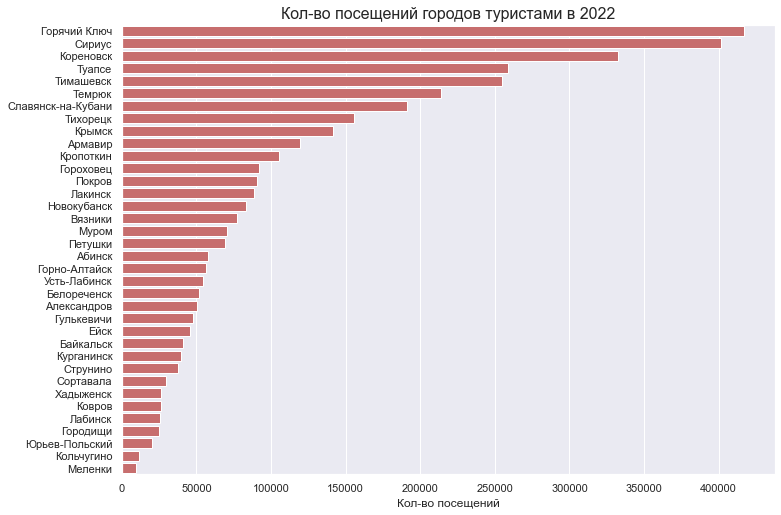

In [27]:
sns.set_color_codes("muted")
sns.barplot(x = df_append_2022['city'].value_counts(), y = df_append_2022['city'].value_counts().index, orient='h', color="r")
#add plot title
plt.title('Кол-во посещений городов туристами в 2022', fontsize=16)
#add axis labels
plt.xlabel('Кол-во посещений')

Text(0.5, 0, 'Кол-во посещений')

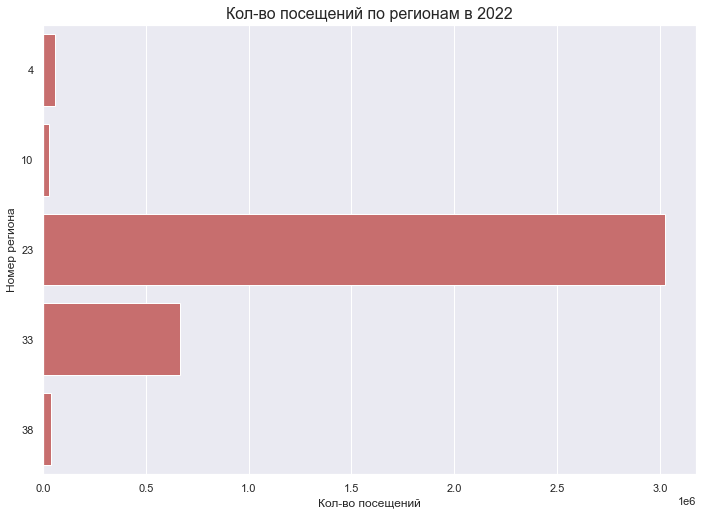

In [28]:
sns.set_color_codes("muted")
sns.barplot(x = df_append_2022['tourists_region'].value_counts(), y = df_append_2022['tourists_region'].value_counts().index, orient='h', color="r")
#add plot title
plt.title('Кол-во посещений по регионам в 2022', fontsize=16)
#add axis labels
plt.ylabel('Номер региона')
plt.xlabel('Кол-во посещений')

In [29]:
print('Рейтинг домашних регионов(2022); количество туристов из каждого региона')
df_append_2022['home_region'].value_counts().head(35)

Рейтинг домашних регионов(2022); количество туристов из каждого региона


77    770773
61    267044
52    241973
78    218418
63    174177
26    139123
34    120184
36    102048
64     97022
2      79698
16     72295
37     64330
56     57590
35     55081
21     54190
58     52927
7      52338
31     51823
66     51025
9      50571
30     45885
73     42571
43     41346
29     38933
76     37105
15     36846
71     36417
48     36078
62     34689
20     34391
74     30972
46     29894
86     29286
32     29077
13     28630
Name: home_region, dtype: int64

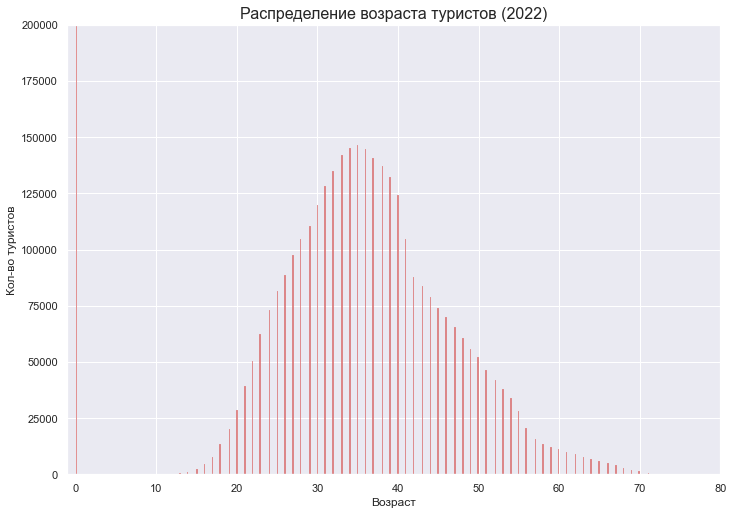

In [30]:
fig, ax = plt.subplots()
sns.histplot(df_append_2022.age, ax=ax, color="r")  # distplot is deprecate and replaced by histplot
ax.set_xlim(-1,80)
ax.set_ylim(0,200000)
#ax.set_xticks(range(1,32))
plt.title('Распределение возраста туристов (2022)', fontsize=16)
#add axis labels
plt.ylabel('Кол-во туристов')
plt.xlabel('Возраст')
plt.show()

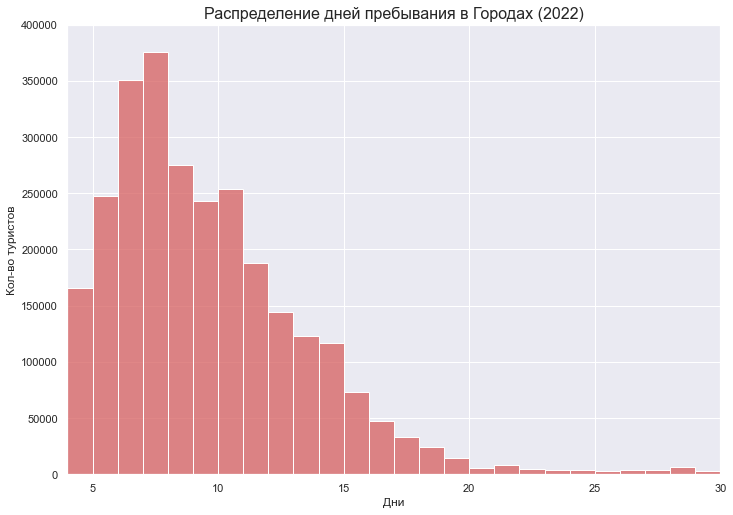

In [31]:
fig, ax = plt.subplots()
sns.histplot(df_append_2022.days, ax=ax, binwidth=1, color="r")  # distplot is deprecate and replaced by histplot
ax.set_xlim(4,30)
ax.set_ylim(0,400000)
#ax.set_xticks(range(1,32))
plt.title('Распределение дней пребывания в Городах (2022)', fontsize=16)
#add axis labels
plt.ylabel('Кол-во туристов')
plt.xlabel('Дни')
plt.show()

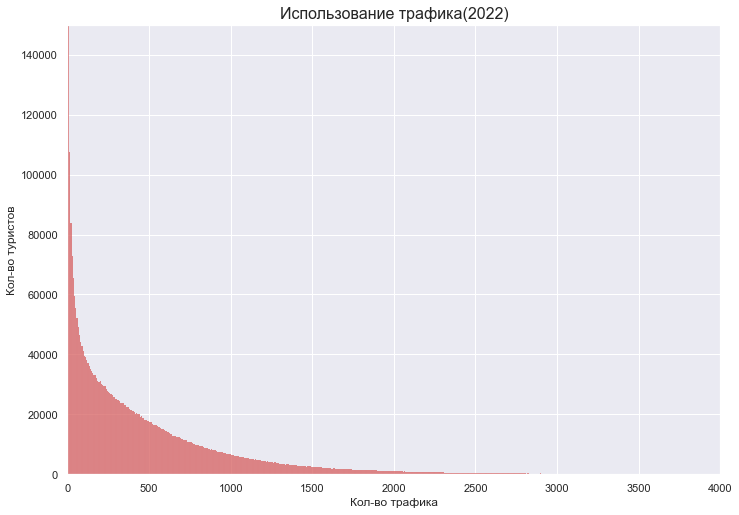

In [32]:
fig, ax = plt.subplots()
sns.histplot(df_append_2022.mou, ax=ax, color="r")  # distplot is deprecate and replaced by histplot
ax.set_xlim(0,4000)
ax.set_ylim(0,150000)
#ax.set_xticks(range(1,32))
plt.title('Использование трафика(2022)', fontsize=16)
#add axis labels
plt.ylabel('Кол-во туристов')
plt.xlabel('Кол-во трафика')
plt.show()

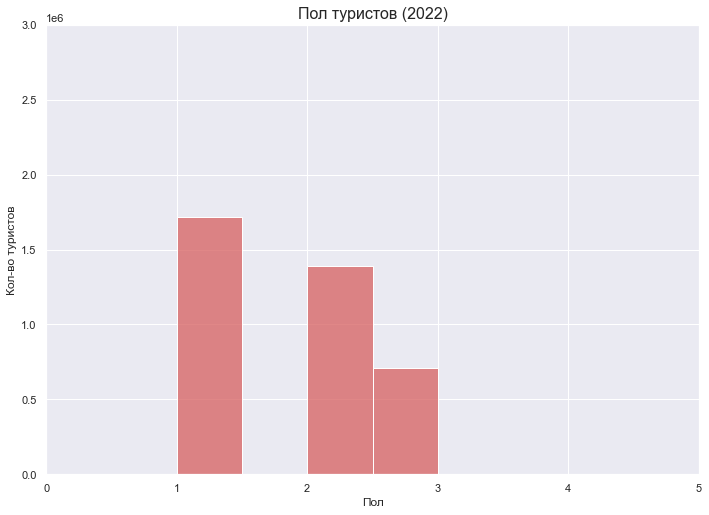

In [33]:
fig, ax = plt.subplots()
sns.histplot(df_append_2022.gender, ax=ax, binwidth=0.5, color="r")  # distplot is deprecate and replaced by histplot
ax.set_xlim(0,5)
ax.set_ylim(0,3000000)
#ax.set_xticks(range(1,32))
plt.title('Пол туристов (2022)', fontsize=16)
#add axis labels
plt.ylabel('Кол-во туристов')
plt.xlabel('Пол')
plt.show()

In [34]:
df_append_2022['interests'].value_counts().head(40)

[Видеоигры и игровые сервисы]                     31431
[Продуктовые сети]                                25946
[Навигация]                                       22145
[Одежда и обувь]                                  21664
[Маркетплейсы]                                    19505
[Покупка техники и электроники]                   17825
[Государственный информационный портал]           11526
[Сайты знакомств]                                 10908
[Передача и хранение данных]                      10219
[Ювелирные украшения и аксессуары]                10078
[Активный отдых]                                   9730
[Фильмы и сериалы, ТВ]                             9217
[Голосовые звонки ]                                8972
[Мессенджеры и чаты]                               8967
[Мобильная связь и интернет]                       8772
[Программное обеспечение]                          7930
[Билеты, отели, путевки]                           6891
[Видеоконтент]                                  

Text(0.5, 0, 'Кол-во поисковых запросов в категории')

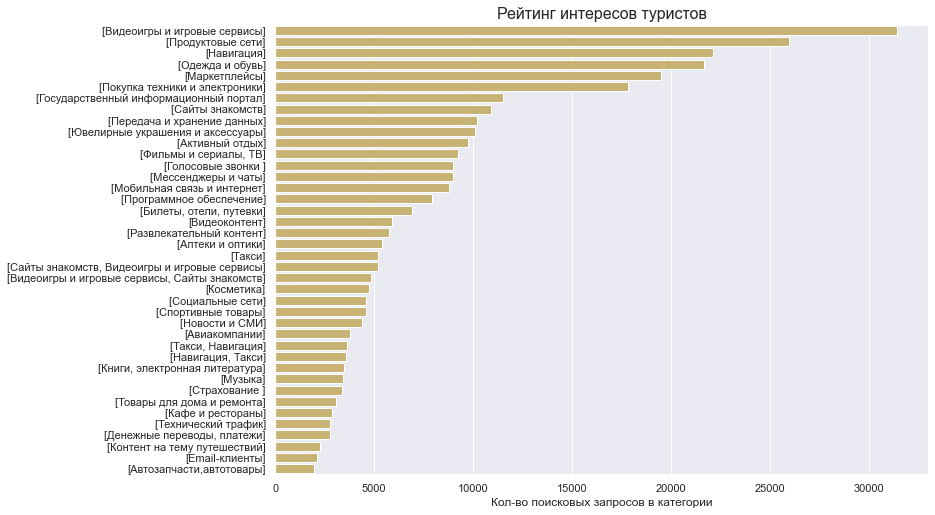

In [35]:
#НЕ самый точный график!! Нужно добавить интересы избольших запросов
sns.set_color_codes("muted")
sns.barplot(x = df_append_2022['interests'].value_counts().head(40), y = df_append_2022['interests'].value_counts().head(40).index, orient='h', color="y")
#add plot title
plt.title('Рейтинг интересов туристов', fontsize=16)
#add axis labels
plt.xlabel('Кол-во поисковых запросов в категории')

# Cleaning

**Replace all wrong values with na**

In [13]:
df_append_2021.loc[(df_append_2021.age > 90) | (df_append_2021.age < 1), 'age'] = 0
df_append_2021['age'] = df_append_2021['age'].replace([0], np.nan)

df_append_2021.loc[(df_append_2021.home_region > 90) | (df_append_2021.home_region < 1), 'home_region'] = 0
df_append_2021['home_region'] = df_append_2021['home_region'].replace([0], np.nan)

df_append_2021.loc[(df_append_2021.mou > 3000), 'mou'] = 0
df_append_2021['mou'] = df_append_2021['mou'].replace([0], np.nan)

df_append_2021.loc[(df_append_2021.mou_out > 3000), 'mou_out'] = 0
df_append_2021['mou_out'] = df_append_2021['mou_out'].replace([0], np.nan)

df_append_2021.loc[(df_append_2021.dou > 307200), 'dou'] = 0
df_append_2021['dou'] = df_append_2021['dou'].replace([0], np.nan)

df_append_2021.loc[(df_append_2021.gender == 3), 'gender'] = 0
df_append_2021['gender'] = df_append_2021['gender'].replace([0], np.nan)

(df_append_2021.isna().sum() / len(df_append_2021)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

In [14]:
df_append_2021.describe().round(2)

Unnamed: 0        days  home_region  tourists_region      gender  \
count  3884691.00  3884691.00   3870431.00       3884691.00  3470175.00   
mean    107686.87        7.13        52.34            24.71        1.47   
std     104479.40        5.15        22.99             4.93        0.50   
min          0.00        1.00         1.00             4.00        1.00   
25%      28603.00        3.00        34.00            23.00        1.00   
50%      70558.00        7.00        59.00            23.00        1.00   
75%     159059.50       10.00        77.00            23.00        2.00   
max     462832.00       49.00        89.00            38.00        2.00   

              age         mou     mou_out         dou  
count  3708353.00  3696722.00  3452664.00  3292361.00  
mean        37.79      480.77      284.55    15149.06  
std         10.01      515.53      332.81    22916.91  
min          4.00        3.17        3.17        3.15  
25%         31.00       93.43       55.93     1901.59  
50%         37.00      316.19      177.52     6990.99  
75%         44.00      689.10      389.64    18896.74  
max         83.00     2999.87     2999.50   307163.16

In [15]:
df_append_2022.loc[(df_append_2021.age > 90) | (df_append_2022.age < 1), 'age'] = 0
df_append_2022['age'] = df_append_2022['age'].replace([0], np.nan)

df_append_2022.loc[(df_append_2022.home_region > 90) | (df_append_2022.home_region < 1), 'home_region'] = 0
df_append_2022['home_region'] = df_append_2022['home_region'].replace([0], np.nan)

df_append_2022.loc[(df_append_2022.mou > 3000), 'mou'] = 0
df_append_2022['mou'] = df_append_2022['mou'].replace([0], np.nan)

df_append_2022.loc[(df_append_2022.mou_out > 3000), 'mou_out'] = 0
df_append_2022['mou_out'] = df_append_2022['mou_out'].replace([0], np.nan)

df_append_2022.loc[(df_append_2022.dou > 307200), 'dou'] = 0
df_append_2022['dou'] = df_append_2022['dou'].replace([0], np.nan)

df_append_2022.loc[(df_append_2022.gender == 3), 'gender'] = 0
df_append_2022['gender'] = df_append_2022['gender'].replace([0], np.nan)

(df_append_2022.isna().sum() / len(df_append_2022)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

In [16]:
df_append_2022.describe().round(2)

Unnamed: 0        days  home_region  tourists_region      gender  \
count  3818880.00  3818880.00   3809795.00       3818880.00  3109808.00   
mean    105307.54        7.03        52.35            24.53        1.45   
std      98966.31        5.02        23.29             4.92        0.50   
min          0.00        1.00         1.00             4.00        1.00   
25%      27925.00        3.00        34.00            23.00        1.00   
50%      69664.00        7.00        61.00            23.00        1.00   
75%     159256.00       10.00        77.00            23.00        2.00   
max     416713.00       48.00        89.00            38.00        2.00   

              age         mou     mou_out         dou    volume_sum  \
count  3333201.00  3620677.00  3371485.00  3265596.00  3.215639e+06   
mean        36.83      453.86      269.30    16555.07  4.651961e+09   
std          9.72      497.35      320.02    24584.10  1.108276e+10   
min          6.00        3.17        3.17        3.15  3.360000e+01   
25%         30.00       83.68       51.43     2248.58  2.012421e+08   
50%         36.00      291.69      165.02     8016.24  1.153883e+09   
75%         43.00      648.16      367.17    20726.44  4.721527e+09   
max        122.00     2999.97     2999.03   307181.25  1.380042e+12   

       dl_volume_sum  ul_volume_sum  
count   3.214204e+06   3.182433e+06  
mean    4.238401e+09   4.197857e+08  
std     1.036633e+10   1.630727e+09  
min     3.360000e+01   4.515000e+01  
25%     1.599831e+08   2.692120e+07  
50%     9.907131e+08   1.262982e+08  
75%     4.189512e+09   4.218594e+08  
max     1.357388e+12   5.072520e+11

**Replace Na with average related to the tourist city if it's possible**

In [17]:
df_append_2021.groupby(['city'], as_index=False).mean().groupby('city')['age'].mean()

city
Абинск                36.962028
Александров           36.861073
Армавир               37.485724
Байкальск             37.514408
Белореченск           39.340278
Вязники               36.227393
Горно-Алтайск         36.368049
Городищи              36.973944
Гороховец             37.294189
Горячий Ключ          40.205915
Гулькевичи            37.438465
Ейск                  38.132030
Ковров                36.117190
Кольчугино            36.583628
Кореновск             36.519106
Кропоткин             38.033262
Крымск                38.411739
Курганинск            41.732222
Лабинск               40.196086
Лакинск               36.087129
Меленки               37.422616
Муром                 37.213136
Новокубанск           39.854624
Петушки               35.771832
Покров                35.900327
Сириус                37.155534
Славянск-на-Кубани    37.015452
Сортавала             38.736567
Струнино              36.687706
Темрюк                38.011116
Тимашевск             38.407865
Тих

In [18]:
df_append_2021['age'] = df_append_2021['age'].fillna(df_append_2021.groupby('city')['age'].transform('mean'))
df_append_2021['mou'] = df_append_2021['mou'].fillna(df_append_2021.groupby('city')['mou'].transform('mean'))
df_append_2021['mou_out'] = df_append_2021['mou_out'].fillna(df_append_2021.groupby('city')['mou_out'].transform('mean'))



In [19]:
(df_append_2021.isna().sum() / len(df_append_2021)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

In [20]:
df_append_2022['age'] = df_append_2022['age'].fillna(df_append_2022.groupby('city')['age'].transform('mean'))
df_append_2022['mou'] = df_append_2022['mou'].fillna(df_append_2022.groupby('city')['mou'].transform('mean'))
df_append_2022['mou_out'] = df_append_2022['mou_out'].fillna(df_append_2022.groupby('city')['mou_out'].transform('mean'))

(df_append_2022.isna().sum() / len(df_append_2022)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

# Портреты в топ 5 городах

In [40]:
top_cities = ['Сириус', 'Горячий Ключ', 'Кореновск', 'Тимашевск', 'Туапсе']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_color_codes("muted")

In [41]:
top_cities = ['Муром', 'Сортавала']

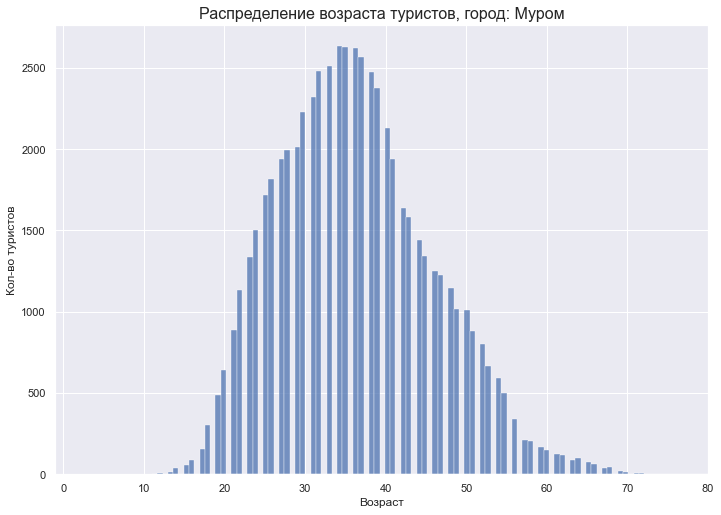

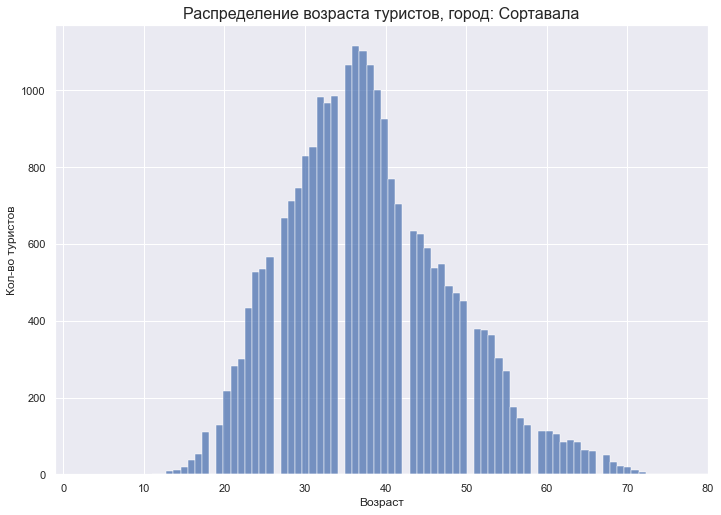

In [42]:
for i in top_cities:
    fig, ax = plt.subplots()
    sns.histplot(df_append_2022[df_append_2022['city'] == i].age, ax=ax)  # distplot is deprecate and replaced by histplot
    ax.set_xlim(-1,80)
    #ax.set_xticks(range(1,32))
    plt.title('Распределение возраста туристов, город: {}'.format(i), fontsize=16)
    #add axis labels
    plt.ylabel('Кол-во туристов')
    plt.xlabel('Возраст')
    plt.show()

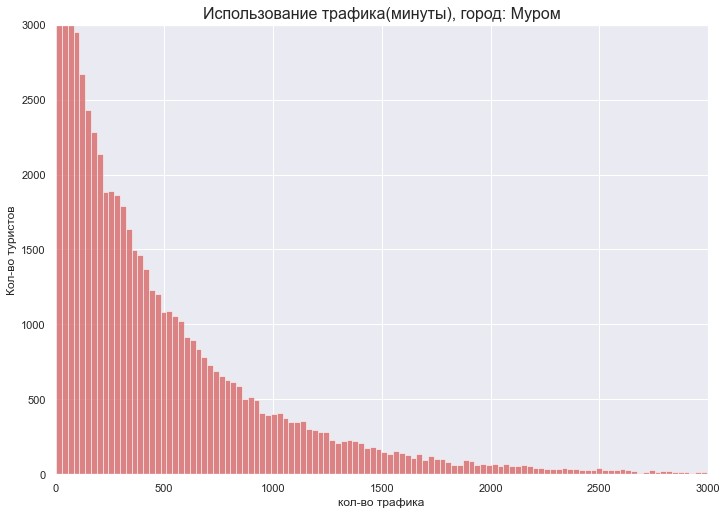

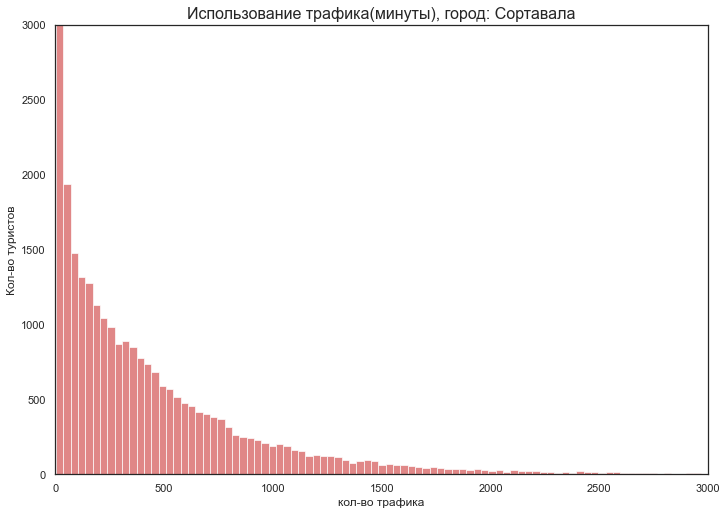

In [43]:
for i in top_cities:
    fig, ax = plt.subplots()
    sns.histplot(df_append_2022[df_append_2022['city'] == i].mou, ax=ax, color = 'r')  # distplot is deprecate and replaced by histplot
    ax.set_xlim(-1,3000)
    ax.set_ylim(-1,3000)
    sns.set_style("white")
    #ax.set_xticks(range(1,32))
    plt.title('Использование трафика(минуты), город: {}'.format(i), fontsize=16)
    
    #add axis labels
    plt.ylabel('Кол-во туристов')
    plt.xlabel('кол-во трафика')
    plt.show()

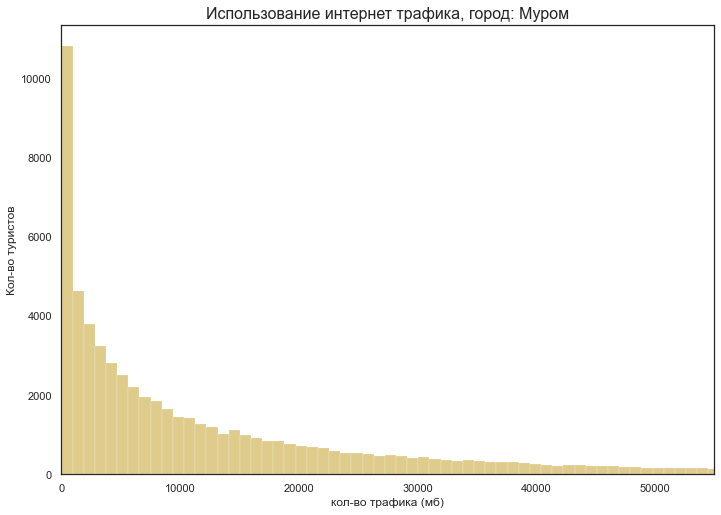

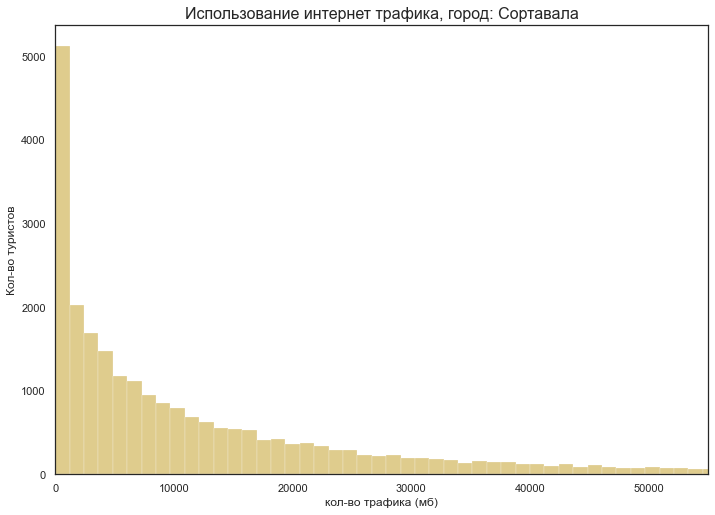

In [44]:
for i in top_cities:
    fig, ax = plt.subplots()
    sns.histplot(df_append_2022[df_append_2022['city'] == i].dou, ax=ax, color = 'y')  # distplot is deprecate and replaced by histplot
    ax.set_xlim(-1,55000)
    #ax.set_xticks(range(1,32))
    plt.title('Использование интернет трафика, город: {}'.format(i), fontsize=16)
    #add axis labels
    plt.ylabel('Кол-во туристов')
    plt.xlabel('кол-во трафика (мб)')
    plt.show()

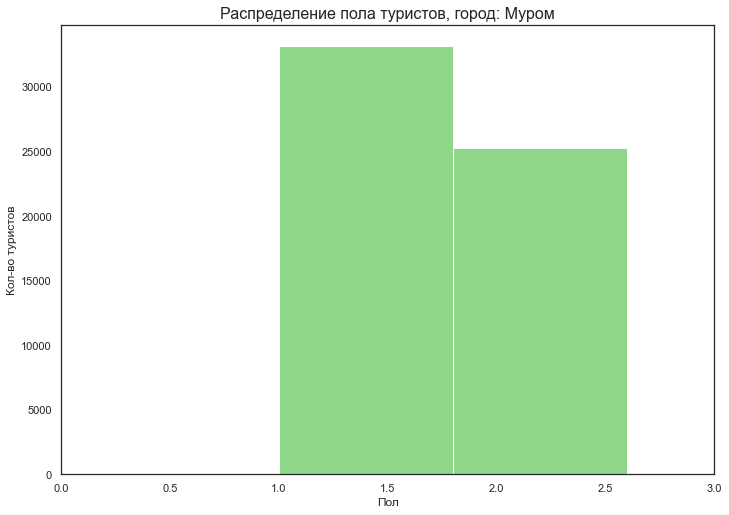

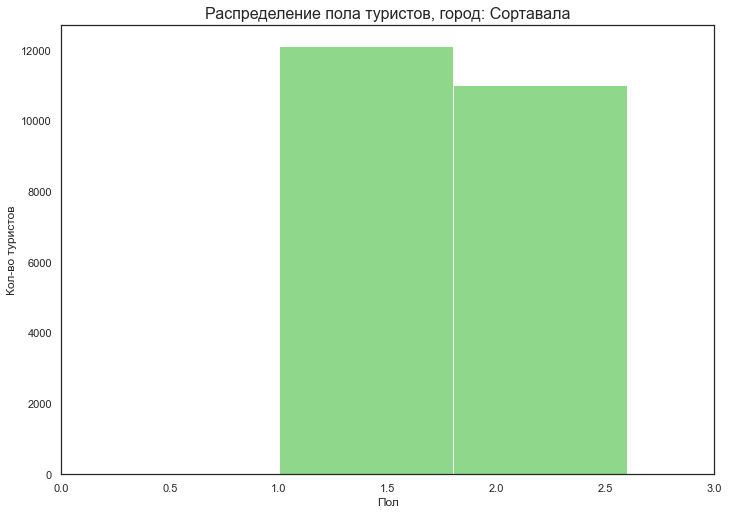

In [45]:
for i in top_cities:
    fig, ax = plt.subplots()
    sns.histplot(df_append_2022[df_append_2022['city'] == i].gender, ax=ax, binwidth=0.8, color = 'g')  # distplot is deprecate and replaced by histplot
    ax.set_xlim(0,3)
    #ax.set_xticks(range(1,32))
    plt.title('Распределение пола туристов, город: {}'.format(i), fontsize=16)
    #add axis labels
    plt.ylabel('Кол-во туристов')
    plt.xlabel('Пол')
    plt.show()

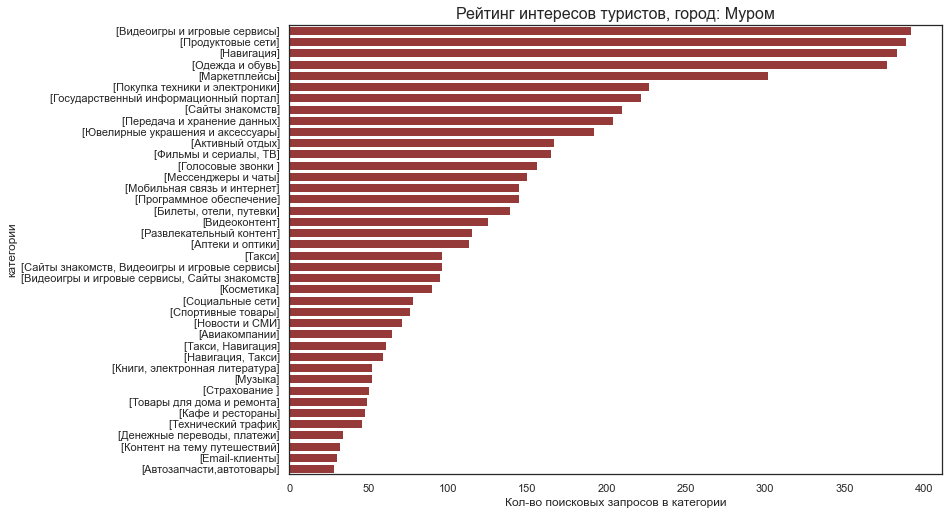

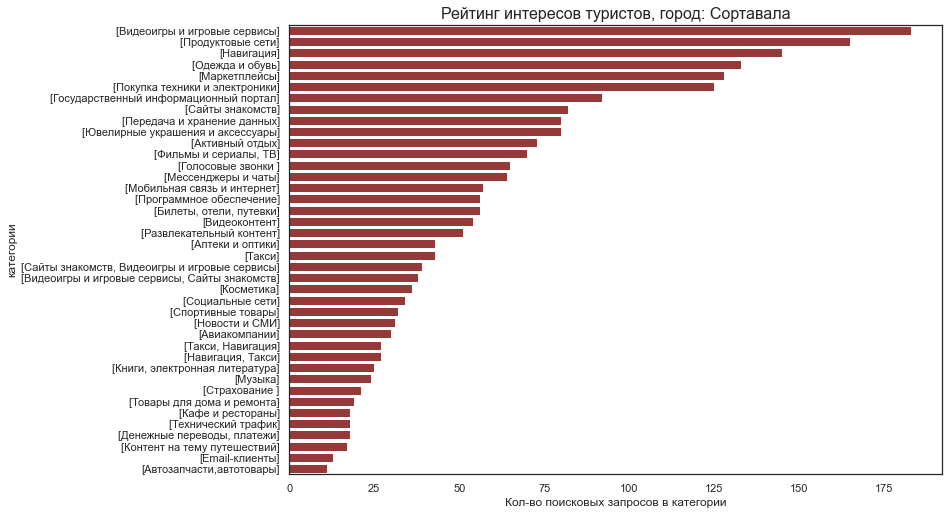

In [46]:
#df_append_2022[df_append_2022['city'] == i]

for i in top_cities: 
    
    sns.set_color_codes("muted")
    sns.barplot(x = df_append_2022[df_append_2022['city'] == i]['interests'].value_counts().head(40), y = df_append_2022['interests'].value_counts().head(40).index, orient='h', color="brown")
    #add plot title
    plt.title('Рейтинг интересов туристов, город: {}'.format(i), fontsize=16)
    #add axis labels
    plt.xlabel('Кол-во поисковых запросов в категории')
    plt.ylabel('категории')
    plt.show()

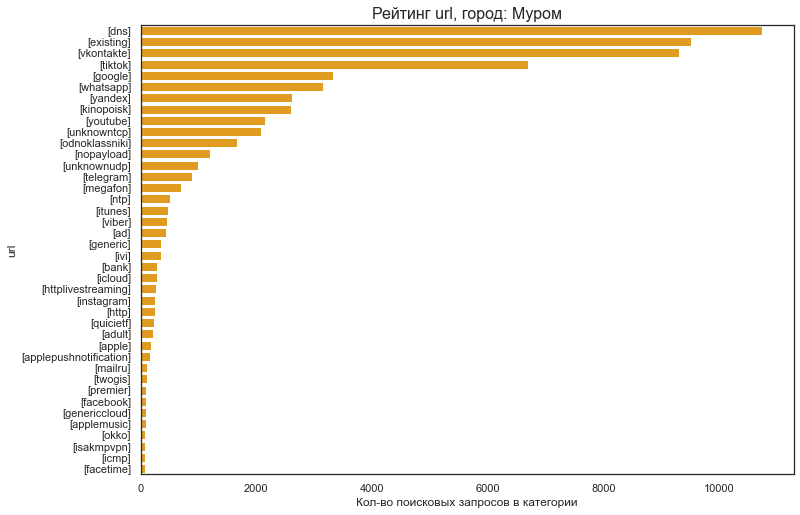

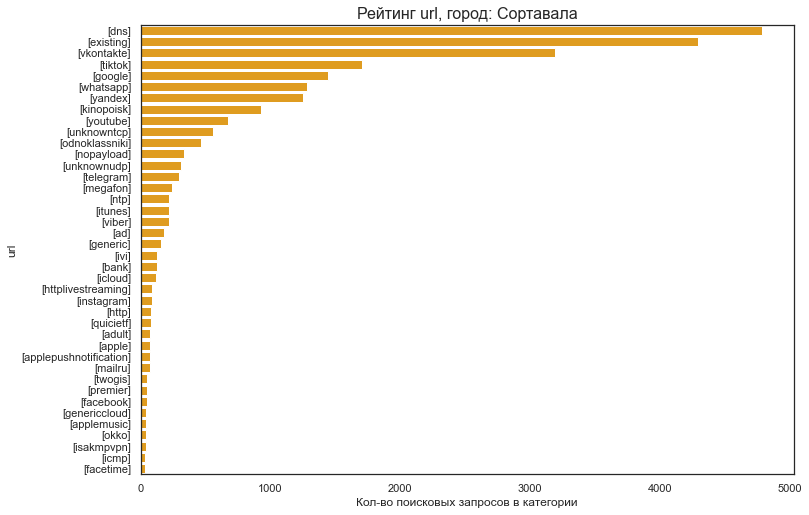

In [47]:
#df_append_2022[df_append_2022['city'] == i]

for i in top_cities: 
    
    sns.set_color_codes("muted")
    sns.barplot(x = df_append_2022[df_append_2022['city'] == i]['top_service'].value_counts().head(40), y = df_append_2022['top_service'].value_counts().head(40).index, orient='h', color="orange")
    #add plot title
    plt.title('Рейтинг url, город: {}'.format(i), fontsize=16)
    #add axis labels
    plt.xlabel('Кол-во поисковых запросов в категории')
    plt.ylabel('url')
    plt.show()

In [155]:
df_append_2022

Unnamed: 0   snap_date                           id_hash  days  \
0                 0  2022.08.01  2fa7cd4cb7ab5f67f0c34d4f54b3455b     7   
1                 1  2022.08.01  699fbcb8aac331a44f42ec53c3bc1771     8   
2                 2  2022.08.01  fc4061f6a486e1e0f2ceecd2c0551168    12   
3                 3  2022.08.01  d9a6addc749c57d5d95f54ef0157d8d9     9   
4                 4  2022.08.01  85ddcc5e113bb26c19b98d56c4154201     7   
...             ...         ...                               ...   ...   
1450507      332322  2022.12.01  1f406635e1666d014f422ec304d70383     8   
1450508      332323  2022.12.01  b200b873880563cf419259fa39a4fde2     1   
1450509      332324  2022.12.01  69426b35294de0239653e21d94bac948     2   
1450510      332325  2022.12.01  07303044b7a5da931e0737332aa3aaf8     9   
1450511      332326  2022.12.01  4970bb0126482da4eccba047f5f7818a     1   

         home_region  tourists_region       city  gender   age          mou  \
0                9.0               23     Абинск     2.0  51.0   494.322480   
1                3.0               23     Абинск     2.0  31.0   329.349980   
2               43.0               23     Абинск     1.0  48.0   334.232500   
3               63.0               23     Абинск     2.0  40.0   171.045000   
4               61.0               23     Абинск     NaN  39.0   367.395000   
...              ...              ...        ...     ...   ...          ...   
1450507         29.0               23  Кореновск     2.0  22.0    31.639997   
1450508          2.0               23  Кореновск     NaN   NaN  2385.547400   
1450509         36.0               23  Кореновск     1.0  30.0  1262.240000   
1450510         77.0               23  Кореновск     1.0  26.0    61.530003   
1450511         26.0               23  Кореновск     1.0  24.0  1255.852500   

             mou_out         dou  \
0         298.847500   7932.8247   
1         206.412490   2366.3914   
2         132.650010   2604.3682   
3         142.135010   1827.8439   
4         224.630000  31482.0270   
...              ...         ...   
1450507    20.772497  14398.3550   
1450508  1391.145000   1127.5391   
1450509   738.272460   8372.1490   
1450510    22.610000   5395.8877   
1450511   607.705000  72157.1300   

                                                 interests   top_service  \
0        [Контент на тему путешествий, Email-клиенты, П...    [existing]   
1        [Активный отдых, Контент на тему путешествий, ...  [unknowntcp]   
2        [Программное обеспечение, Активный отдых, Моби...         [dns]   
3        [Кулинария и рецепты, Новости и СМИ, Образован...     [youtube]   
4        [Навигация, Активный отдых, Мессенджеры и чаты...    [existing]   
...                                                    ...           ...   
1450507  [Видеоигры и игровые сервисы, Образование для ...    [existing]   
1450508  [Навигация, Сайты знакомств, Программное обесп...      [yandex]   
1450509  [Маркетплейсы, Автозапчасти,автотовары, Навига...  [unknowntcp]   
1450510  [Фильмы и сериалы, ТВ, Сайты знакомств, Навига...         [dns]   
1450511  [Передача и хранение данных, Навигация, Контен...    [existing]   

           volume_sum  dl_volume_sum  ul_volume_sum  
0        2.779278e+09   2.378326e+09   4.009526e+08  
1        3.199224e+09   2.500532e+09   6.986923e+08  
2        9.823515e+08   9.017218e+08   8.062974e+07  
3        5.062598e+08   4.584678e+08   4.779204e+07  
4        4.833227e+10   4.569014e+10   2.642137e+09  
...               ...            ...            ...  
1450507           NaN            NaN            NaN  
1450508  7.699814e+07   6.616746e+07   1.083069e+07  
1450509  5.184549e+08   4.296156e+08   8.883928e+07  
1450510  3.186956e+09   2.873364e+09   3.135923e+08  
1450511  2.450147e+10   2.302783e+10   1.473634e+09  

[1450512 rows x 17 columns]

In [90]:
chosen_cities = ['Муром', 'Кореновск', 'Сортавала', 'Юрьев-Польский', 'Абинск','Меленки']

In [118]:
x,y = df_append_2022[df_append_2022['city'].isin(chosen_cities)].shape
x

390098

In [139]:
df_chosen_cities = df_append_2022[df_append_2022['city'].isin(chosen_cities)]
print(df_chosen_cities.shape)
df_chosen_cities_age=df_chosen_cities[df_chosen_cities['age'].notnull()]
df_chosen_cities_age.shape

(390098, 17)


(343332, 17)

In [180]:
age_upper = 40
age_down = 20
x,y = df_chosen_cities_age.shape
group_a = df_chosen_cities_age[(df_chosen_cities_age['age']<age_upper) & (df_chosen_cities_age['age']>age_down)]
z,c = group_a.shape
print("Group A age range is from",age_down, "to", age_upper, "years")
print("Group A proportion from the whole group is",round(z/x*100,2),"%")

gender_group_a = group_a['gender'].value_counts(normalize = True)
print("Group A gender distribution")
print(gender_group_a)
group_a_male = group_a[group_a['gender']==1]
group_a_female = group_a[group_a['gender']==2]

print('Male median voice trafic', group_a_male['mou'].median())
print('Female median voice trafic', group_a_female['mou'].median())
print('Male median internet trafic', group_a_male['dou'].median())
print('Female median internet trafic', group_a_female['dou'].median())
print('Male top interests')
print(group_a_male['interests'].value_counts(normalize=True).head())
print('Female top interests')      
print(group_a_female['interests'].value_counts(normalize=True).head())
print('Male top services')
print(group_a_male['top_service'].value_counts(normalize=True).head(6))
print('Female top services')      
print(group_a_female['top_service'].value_counts(normalize=True).head(6))

print()
print()


age_upper = 65
age_down = 40
group_a = df_chosen_cities_age[(df_chosen_cities_age['age']<age_upper) & (df_chosen_cities_age['age']>age_down)]
z,c = group_a.shape
print("Group A age range is from",age_down, "to", age_upper, "years")
print("Group A proportion from the whole group is",round(z/x*100,2),"%")

gender_group_a = group_a['gender'].value_counts(normalize = True)
print("Group A gender distribution")
print(gender_group_a)
group_a_male = group_a[group_a['gender']==1]
group_a_female = group_a[group_a['gender']==2]

print('Male median voice trafic', group_a_male['mou'].median())
print('Female median voice trafic', group_a_female['mou'].median())
print('Male median internet trafic', group_a_male['dou'].median())
print('Female median internet trafic', group_a_female['dou'].median())
print('Male top interests')
print(group_a_male['interests'].value_counts(normalize=True).head())
print('Female top interests')      
print(group_a_female['interests'].value_counts(normalize=True).head())
print('Male top services')
print(group_a_male['top_service'].value_counts(normalize=True).head(6))
print('Female top services')      
print(group_a_female['top_service'].value_counts(normalize=True).head(6))

Group A age range is from 20 to 40 years
Group A proportion from the whole group is 66.13 %
Group A gender distribution
1.0    0.564405
2.0    0.435595
Name: gender, dtype: float64
Male median voice trafic 293.8775
Female median voice trafic 412.48375
Male median internet trafic 13342.1505
Female median internet trafic 12279.804
Male top interests
[Видеоигры и игровые сервисы]                     0.014784
[Навигация]                                       0.008505
[Сайты знакомств]                                 0.003243
[Сайты знакомств, Видеоигры и игровые сервисы]    0.003234
[Покупка техники и электроники]                   0.003036
Name: interests, dtype: float64
Female top interests
[Видеоигры и игровые сервисы]      0.010639
[Одежда и обувь]                   0.004525
[Маркетплейсы]                     0.002982
[Сайты знакомств]                  0.002425
[Покупка техники и электроники]    0.002402
Name: interests, dtype: float64
Male top services
[vkontakte]    0.139446
[dns]   

In [49]:
df_append_2021.describe().round(2)

Unnamed: 0        days  home_region  tourists_region      gender  \
count  3884691.00  3884691.00   3870431.00       3884691.00  3470175.00   
mean    107686.87        7.13        52.34            24.71        1.47   
std     104479.40        5.15        22.99             4.93        0.50   
min          0.00        1.00         1.00             4.00        1.00   
25%      28603.00        3.00        34.00            23.00        1.00   
50%      70558.00        7.00        59.00            23.00        1.00   
75%     159059.50       10.00        77.00            23.00        2.00   
max     462832.00       49.00        89.00            38.00        2.00   

              age         mou     mou_out         dou  
count  3708353.00  3696722.00  3452664.00  3292361.00  
mean        37.79      480.77      284.55    15149.06  
std         10.01      515.53      332.81    22916.91  
min          4.00        3.17        3.17        3.15  
25%         31.00       93.43       55.93     1901.59  
50%         37.00      316.19      177.52     6990.99  
75%         44.00      689.10      389.64    18896.74  
max         83.00     2999.87     2999.50   307163.16

# Делаем табличку по месяцам

In [21]:
df_Abinsk = df_append_2021[df_append_2021['city'] == 'Абинск']
df_Abinsk

Unnamed: 0   snap_date                           id_hash  days  \
0               0  2021.07.01  61fc25d86364a6a5d6e85319bcf7aef5     3   
1               1  2021.07.01  c42fc8d3ad95a2e006567967814463a3    15   
2               2  2021.07.01  ce99dc79821948d73c0d2ab2d9eee25d     5   
3               3  2021.07.01  02db2c7539fb8a552f48b42e3096151f    11   
4               4  2021.07.01  d3fd4dd683cf977fabbf8804d4006dfe     1   
...           ...         ...                               ...   ...   
55043       55043  2021.12.01  483bd8549e39af74c3104ae3e7ea3afa     1   
55044       55044  2021.12.01  767acc39d873b28e7d4da771b88546a0    12   
55045       55045  2021.12.01  767acc39d873b28e7d4da771b88546a0    12   
55046       55046  2021.12.01  c1f6ee796f3b7ab96501d34947d3bf4e     7   
55047       55047  2021.12.01  c1f6ee796f3b7ab96501d34947d3bf4e     7   

       home_region  tourists_region    city  gender   age          mou  \
0             77.0               23  Абинск     1.0  47.0    33.512500   
1             61.0               23  Абинск     2.0  28.0  1738.257600   
2             34.0               23  Абинск     1.0  36.0   326.655000   
3             72.0               23  Абинск     2.0  34.0   165.549990   
4              7.0               23  Абинск     2.0  33.0  1355.112500   
...            ...              ...     ...     ...   ...          ...   
55043         46.0               23  Абинск     1.0  33.0   250.092500   
55044         61.0               23  Абинск     2.0  48.0     9.135000   
55045         61.0               23  Абинск     2.0  48.0     9.135000   
55046         71.0               23  Абинск     1.0  25.0    15.819999   
55047         71.0               23  Абинск     1.0  25.0    15.819999   

           mou_out           dou  
0       278.835792      8.053427  
1      1029.315000  46874.117000  
2       173.512500  31097.098000  
3        39.917496   2390.938200  
4       469.910000    600.361100  
...            ...           ...  
55043    95.095000  18045.334000  
55044   278.835792           NaN  
55045   278.835792           NaN  
55046     4.357500  47604.055000  
55047     4.357500  47604.055000  

[55048 rows x 12 columns]

In [22]:
df_Abinsk.id_hash.nunique()

46902

In [23]:
df_Abinsk.dtypes
df_Abinsk['snap_date'] = pd.to_datetime(df_Abinsk['snap_date'], errors='coerce')
df_Abinsk.dtypes

#dg = df.groupby(pd.Grouper(key='date', freq='1M')).sum() # groupby each 1 month
#dg.index = dg.index.strftime('%B')

Unnamed: 0                  int64
snap_date          datetime64[ns]
id_hash                    object
days                        int64
home_region               float64
tourists_region             int64
city                       object
gender                    float64
age                       float64
mou                       float64
mou_out                   float64
dou                       float64
dtype: object

In [24]:
df_sums = df_Abinsk.groupby(pd.Grouper(key='snap_date', freq='1M'))['days'].sum() #['gender'].mean() # groupby each 1 month
df_sums.index = df_sums.index.strftime('%B')
df_sums

snap_date
January       4981
February      5552
March         9547
April        10619
May          17420
June         61637
July         88837
August       70935
September    47069
October      17939
November      9853
December      5822
Name: days, dtype: int64

In [25]:
df_means = df_Abinsk.groupby(pd.Grouper(key='snap_date', freq='1M'))['days','gender', 'age', 'mou', 'mou_out', 'dou'].mean() #['gender'].mean() # groupby each 1 month
df_means.index = df_means.index.strftime('%B')
df_means



days    gender        age         mou     mou_out           dou
snap_date                                                                     
January    5.479648  1.374083  37.655053  500.171738  289.304817  15159.056125
February   5.969892  1.317365  38.183354  532.147228  320.677552  14522.053833
March      6.042405  1.401283  37.562803  571.557338  341.858708  16068.565333
April      5.487855  1.400339  37.549073  562.364754  326.992115  15149.250414
May        5.739703  1.482430  37.134248  523.712894  306.188312  15494.064487
June       7.081457  1.581492  35.797240  463.940015  271.789715  13936.994518
July       6.984590  1.583007  36.095410  450.335384  258.116301  15632.135002
August     6.491124  1.474436  37.099340  448.869680  261.156825  14950.742429
September  5.850715  1.463916  38.653821  464.819928  268.671513  13562.505716
October    5.595446  1.418287  37.622239  516.491440  309.300293  15879.423496
November   5.464781  1.308611  36.822764  531.949522  325.924360  19067.006092
December   4.642743  1.220074  36.811015  574.526176  353.042301  17930.364958

In [26]:
df_nuniq = df_Abinsk.groupby(pd.Grouper(key='snap_date', freq='1M'))['id_hash'].nunique() #['gender'].mean() # groupby each 1 month
df_nuniq.index = df_nuniq.index.strftime('%B')
df_nuniq


snap_date
January        909
February       930
March         1580
April         1935
May           3035
June          8704
July         12719
August       10928
September     4322
October       1746
November       967
December       684
Name: id_hash, dtype: int64

In [27]:
df_tot = df_Abinsk.groupby(pd.Grouper(key='snap_date', freq='1M'))['Unnamed: 0'].nunique() #['gender'].mean() # groupby each 1 month
df_tot.index = df_tot.index.strftime('%B')
df_tot

snap_date
January        909
February       930
March         1580
April         1935
May           3035
June          8704
July         12719
August       10928
September     8045
October       3206
November      1803
December      1254
Name: Unnamed: 0, dtype: int64

In [28]:
df_Abinsk['id_hash'].value_counts().sum()

55048

In [29]:
df_concat_Abinsk_2021 = pd.concat([df_tot, df_nuniq, df_sums], axis=1)
df_concat_Abinsk_2021.rename(columns = {'Unnamed: 0':'tourists', 'id_hash':'tourists_uniq','days':'days_sum'}, inplace = True)
df_concat_Abinsk_2021

tourists  tourists_uniq  days_sum
snap_date                                   
January         909            909      4981
February        930            930      5552
March          1580           1580      9547
April          1935           1935     10619
May            3035           3035     17420
June           8704           8704     61637
July          12719          12719     88837
August        10928          10928     70935
September      8045           4322     47069
October        3206           1746     17939
November       1803            967      9853
December       1254            684      5822

In [30]:
df_concat_Abinsk_2021 = pd.concat([df_concat_Abinsk_2021, df_means], axis=1)
df_concat_Abinsk_2021.rename(columns = {'days':'days_mean', 'gender':'gender_mean','age':'age_mean'}, inplace = True)
df_concat_Abinsk_2021

tourists  tourists_uniq  days_sum  days_mean  gender_mean  \
snap_date                                                              
January         909            909      4981   5.479648     1.374083   
February        930            930      5552   5.969892     1.317365   
March          1580           1580      9547   6.042405     1.401283   
April          1935           1935     10619   5.487855     1.400339   
May            3035           3035     17420   5.739703     1.482430   
June           8704           8704     61637   7.081457     1.581492   
July          12719          12719     88837   6.984590     1.583007   
August        10928          10928     70935   6.491124     1.474436   
September      8045           4322     47069   5.850715     1.463916   
October        3206           1746     17939   5.595446     1.418287   
November       1803            967      9853   5.464781     1.308611   
December       1254            684      5822   4.642743     1.220074   

            age_mean         mou     mou_out           dou  
snap_date                                                   
January    37.655053  500.171738  289.304817  15159.056125  
February   38.183354  532.147228  320.677552  14522.053833  
March      37.562803  571.557338  341.858708  16068.565333  
April      37.549073  562.364754  326.992115  15149.250414  
May        37.134248  523.712894  306.188312  15494.064487  
June       35.797240  463.940015  271.789715  13936.994518  
July       36.095410  450.335384  258.116301  15632.135002  
August     37.099340  448.869680  261.156825  14950.742429  
September  38.653821  464.819928  268.671513  13562.505716  
October    37.622239  516.491440  309.300293  15879.423496  
November   36.822764  531.949522  325.924360  19067.006092  
December   36.811015  574.526176  353.042301  17930.364958

In [64]:
df_append_2022.top_service.value_counts()

[dns]                457407
[existing]           432583
[vkontakte]          413958
[tiktok]             308549
[google]             215277
                      ...  
[fifa17game]              1
[webrtc]                  1
[rulesofsurvival]         1
[gtp1]                    1
[airbnb]                  1
Name: top_service, Length: 393, dtype: int64

In [65]:
df_append_2022.shape

(3818880, 17)

In [66]:
df_append_2021.shape

(3884691, 12)

In [31]:
cities =  file_list_2021
cities = [cities.replace('Data_2021/Tourists_', '') for cities in file_list_2021]
list_cities = [list_cities.replace('_2021.csv', '') for list_cities in cities]

for i in range(len(list_cities)):
    if list_cities[i] == 'Байкальск':
        list_cities[i] = 'Байкальск'
    elif list_cities[i] == 'Горно-Алтайск':
        list_cities[i] = 'Горно-Алтайск'
    elif list_cities[i] == 'Горячий Ключ':
        list_cities[i] = 'Горячий Ключ'
    elif list_cities[i] == 'Ейск':
        list_cities[i] = 'Ейск'
    elif list_cities[i] == 'Юрьев-Польский':
        list_cities[i] = 'Юрьев-Польский'
    

In [32]:
df_test = {}
df_city_2021 = {}
for name in list_cities:
    df_test[name] = df_append_2021[df_append_2021['city'] == name]
    df_test[name]['snap_date'] = pd.to_datetime(df_test[name]['snap_date'], errors='coerce')
    
    df_sums = df_test[name].groupby(pd.Grouper(key='snap_date', freq='1M'))['days'].sum() #['gender'].mean() # groupby each 1 month
    df_sums.index = df_sums.index.strftime('%B')
    
    df_means = df_test[name].groupby(pd.Grouper(key='snap_date', freq='1M'))['days','gender', 'age', 'mou', 'mou_out', 'dou'].mean() #['gender'].mean() # groupby each 1 month
    df_means.index = df_means.index.strftime('%B')
    
    df_nuniq = df_test[name].groupby(pd.Grouper(key='snap_date', freq='1M'))['id_hash'].nunique() #['gender'].mean() # groupby each 1 month
    df_nuniq.index = df_nuniq.index.strftime('%B')
    
    df_tot = df_test[name].groupby(pd.Grouper(key='snap_date', freq='1M'))['Unnamed: 0'].nunique() #['gender'].mean() # groupby each 1 month
    df_tot.index = df_tot.index.strftime('%B')
    
    df_concat_2021 = pd.concat([df_tot, df_nuniq, df_sums], axis=1)
    df_concat_2021.rename(columns = {'Unnamed: 0':'tourists', 'id_hash':'tourists_uniq','days':'days_sum'}, inplace = True)
    
    df_concat_2021 = pd.concat([df_concat_2021, df_means], axis=1)
    df_concat_2021.rename(columns = {'days':'days_mean', 'gender':'gender_mean','age':'age_mean'}, inplace = True)
    
    city = [name] * 12
    period = [1,2,3,4,5,6,7,8,9,10,11,12]
    df_concat_2021.insert(loc=0, column='period', value=period)
    df_concat_2021['city'] = city
    
    df_city_2021[name] = df_concat_2021

In [33]:
df_test_2022 = {}
df_city_2022 = {}
for name in list_cities:
    df_test_2022[name] = df_append_2022[df_append_2022['city'] == name]
    df_test_2022[name]['snap_date'] = pd.to_datetime(df_test_2022[name]['snap_date'], errors='coerce')
    
    df_sums = df_test_2022[name].groupby(pd.Grouper(key='snap_date', freq='1M'))['days'].sum() #['gender'].mean() # groupby each 1 month
    df_sums.index = df_sums.index.strftime('%B')
    
    df_means = df_test_2022[name].groupby(pd.Grouper(key='snap_date', freq='1M'))['days','gender', 'age', 'mou', 'mou_out', 'dou'].mean() #['gender'].mean() # groupby each 1 month
    df_means.index = df_means.index.strftime('%B')
    
    df_nuniq = df_test_2022[name].groupby(pd.Grouper(key='snap_date', freq='1M'))['id_hash'].nunique() #['gender'].mean() # groupby each 1 month
    df_nuniq.index = df_nuniq.index.strftime('%B')
    
    df_tot = df_test_2022[name].groupby(pd.Grouper(key='snap_date', freq='1M'))['Unnamed: 0'].nunique() #['gender'].mean() # groupby each 1 month
    df_tot.index = df_tot.index.strftime('%B')
    
    df_concat_2022 = pd.concat([df_tot, df_nuniq, df_sums], axis=1)
    df_concat_2022.rename(columns = {'Unnamed: 0':'tourists', 'id_hash':'tourists_uniq','days':'days_sum'}, inplace = True)
    
    df_concat_2022 = pd.concat([df_concat_2022, df_means], axis=1)
    df_concat_2022.rename(columns = {'days':'days_mean', 'gender':'gender_mean','age':'age_mean'}, inplace = True)
    
    city = [name] * 12
    period = list(range(13, 25))
    df_concat_2022.insert(loc=0, column='period', value=period)
    df_concat_2022['city'] = city
    
    df_city_2022[name] = df_concat_2022

In [34]:
df_all_cities = {}
for name in list_cities:
    df_all_cities[name] = pd.concat([df_city_2021[name], df_city_2022[name]], ignore_index=False)
    df_all_cities[name].reset_index()

In [35]:
period12 = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]
for name in list_cities:
    df_all_cities[name]['period12'] = period12

for name in list_cities:
    df_all_cities[name]['month'] = df_all_cities[name].index
    df_all_cities[name] = df_all_cities[name].reset_index(drop=True)
    
    
for name in list_cities:    
    df_all_cities[name]['month_sin'] = np.sin(2 * np.pi * df_all_cities[name]['period12']/12.0)
    df_all_cities[name]['month_cos'] = np.cos(2 * np.pi * df_all_cities[name]['period12']/12.0)


In [36]:
list_cities_correction = list_cities.copy()

In [37]:
list_cities_correction  = [e for e in list_cities_correction if e not in ('Сириус', 'Ейск', 'Гороховец', 'Лакинск',
                                                                         'Покров', 'Вязники', 'Петушки', 'Александров',
                                                                         'Ковров', 'Городищи')]

In [38]:
df_all_cities_dynamics = {}
df_tourists_dynamics = pd.DataFrame()
df_avgdays_dynamics = pd.DataFrame()
for name in list_cities_correction:
    
    df_all_cities_dynamics[name] = df_all_cities[name].copy()
    df_all_cities_dynamics[name].reset_index(drop=True)
    
    df_all_cities_dynamics[name].drop(df_all_cities_dynamics[name].columns[[0,2,3,5,6,7,8,9]], axis=1, inplace=True)
    change_tour = df_all_cities[name]['tourists'].pct_change().fillna(0)
    change_days = df_all_cities[name]['days_mean'].pct_change().fillna(0)
    
    df_all_cities_dynamics[name].insert(loc=0, column='change_tour', value=change_tour)
    df_all_cities_dynamics[name].insert(loc=2, column='change_days', value=change_days)
    
    
    df_tourists_dynamics[name] = change_tour
    df_avgdays_dynamics[name] = change_days

In [39]:
df_tourists_dynamics = df_tourists_dynamics.reset_index()
df_avgdays_dynamics = df_avgdays_dynamics.reset_index()

In [40]:
region_33 = ['Муром', 'Струнино', 'Юрьев-Польский', 'Кольчугино', 'Меленки']
def highlight_max(s):
    if s.dtype == np.object:
        is_neg = [False for _ in range(s.shape[0])]
    else:
        is_neg = s < 0
    return ['color: red;' if cell else 'color:black' 
            for cell in is_neg]


In [41]:
df_tourists_dynamics

index    Абинск   Армавир  Байкальск  Белореченск  Горно-Алтайск  \
0       0  0.000000  0.000000   0.000000     0.000000       0.000000   
1       1  0.023102  0.063407   0.152249     0.022465      -0.068881   
2       2  0.698925  0.284243   0.230230     0.229755       0.048877   
3       3  0.224684  0.046243  -0.087469     0.310362       0.549118   
4       4  0.568475  0.302620   0.032992     0.480327       1.792683   
5       5  1.867875  0.422766   0.684937     0.621316       1.253857   
6       6  0.461282  0.549476   0.445184     0.577341       0.985792   
7       7 -0.140813  0.085273  -0.081000    -0.018831      -0.311825   
8       8 -0.263818  0.039401   0.062295     0.012795      -0.446314   
9       9 -0.601492 -0.373019  -0.001634    -0.530807      -0.606692   
10     10 -0.437617 -0.318533  -0.222222    -0.477378      -0.493056   
11     11 -0.304493 -0.332732  -0.284545    -0.175676      -0.414384   
12     12 -0.321372 -0.211694  -0.235294    -0.239242      -0.071637   
13     13  0.034078  0.042105   0.051709    -0.112458       0.066142   
14     14  0.165909  0.161146   0.171475     0.111533       0.172821   
15     15  0.658869  0.344325  -0.069719     0.666894       1.222922   
16     16  0.331375  0.142664  -0.042878     0.284603       1.092351   
17     17  2.225508  0.655340   0.634982     0.884922       1.720552   
18     18  1.244356  0.875408   0.733143     1.073398       1.025182   
19     19  0.030115  0.141015  -0.202640     0.028956      -0.391114   
20     20 -0.591372 -0.516285  -0.464655    -0.501863      -0.701994   
21     21 -0.746705 -0.452575  -0.048953    -0.585773      -0.616468   
22     22 -0.373356 -0.229992  -0.060278    -0.373799      -0.421610   
23     23 -0.375000 -0.417396  -0.329730    -0.487117      -0.439560   

    Горячий Ключ  Гулькевичи  Кольчугино  Кореновск  ...  Славянск-на-Кубани  \
0       0.000000    0.000000    0.000000   0.000000  ...            0.000000   
1      -0.065857    0.044589   -0.175325  -0.064666  ...           -0.165330   
2       0.550195    0.277248    0.178478   0.351733  ...            0.894309   
3       0.156764   -0.030500    0.523385   0.284358  ...            0.479516   
4       0.627140    0.234270    0.538012   0.540298  ...            1.039821   
5       2.280871    0.312636   -0.010456   1.989096  ...            2.609955   
6       0.608644    0.234869    0.121037   0.715466  ...            0.690363   
7      -0.003650   -0.033791   -0.056555  -0.060932  ...           -0.002119   
8      -0.135295    0.064751    0.085377  -0.328216  ...           -0.409087   
9      -0.732106   -0.141789    0.021757  -0.727411  ...           -0.788122   
10     -0.569927   -0.276430   -0.227682  -0.431405  ...           -0.472613   
11     -0.536663   -0.367374   -0.381760  -0.375188  ...           -0.352090   
12      0.191514   -0.169288   -0.210978  -0.056699  ...           -0.316129   
13     -0.087199    0.147982    0.126087  -0.067301  ...            0.088534   
14      0.444538    0.216580    0.081081   0.249565  ...            0.692667   
15      0.713139    0.285765    0.482143   0.982079  ...            1.046081   
16      0.223945   -0.039401    0.306024   0.176914  ...            0.238691   
17      2.669707    0.448585    0.199262   2.457021  ...            2.978244   
18      1.267436    0.566102    0.701538   1.540161  ...            1.309453   
19      0.008292    0.050038   -0.266275  -0.036394  ...            0.027249   
20     -0.510552   -0.442585   -0.314849  -0.600726  ...           -0.647424   
21     -0.779688   -0.267131   -0.087230  -0.807782  ...           -0.814085   
22     -0.524781   -0.170080   -0.306404  -0.376577  ...           -0.464959   
23     -0.521134   -0.454578   -0.473011  -0.394054  ...           -0.396714   

    Сортавала  Струнино    Темрюк  Тимашевск  Тихорецк    Туапсе  \
0    0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1   -0.403640  0.154179 -0.067297   0.049257  0.035890 -0.066761  

# Владимирская Область

In [77]:
df_tourists_dynamics[region_33].style.apply(highlight_max)

In [78]:
chosen_cities = ['Кореновск', 'Муром', 'Абинск', 'Сортавала', 'Юрьев-Польский', 'Меленки']

In [ ]:
print(

In [79]:
df_tourists_dynamics[chosen_cities]

Кореновск     Муром    Абинск  Сортавала  Юрьев-Польский   Меленки
0    0.000000  0.000000  0.000000   0.000000        0.000000  0.000000
1   -0.064666  0.066185  0.023102  -0.403640        0.184261  0.056122
2    0.351733  0.215576  0.698925   0.028725       -0.034036  0.246377
3    0.284358  0.123027  0.224684   0.431065        0.352349  0.089147
4    0.540298  0.257751  0.568475   1.426829        0.358561  0.288256
5    1.989096  0.080197  1.867875   1.010050        0.136073  0.204420
6    0.715466  0.092804  0.461282   0.583250        0.329582  0.173165
7   -0.060932 -0.000975 -0.140813  -0.203853        0.151753 -0.010753
8   -0.328216  0.285535 -0.263818  -0.314359        0.145407  0.094862
9   -0.727411 -0.035230 -0.601492  -0.384148       -0.037122 -0.058664
10  -0.431405 -0.238090 -0.437617  -0.624706       -0.280819 -0.194631
11  -0.375188 -0.287716 -0.304493  -0.387985       -0.331568 -0.242857
12  -0.056699 -0.209731 -0.321372   0.386503       -0.318812 -0.342767
13  -0.067301 -0.126801  0.034078  -0.299410        0.375000 -0.081340
14   0.249565  0.363936  0.165909   0.477895        0.198732  0.377604
15   0.982079  0.257369  0.658869   0.317664        0.382716  0.347826
16   0.176914  0.123338  0.331375   1.268108        0.237883  0.120617
17   2.457021  0.261641  2.225508   1.511439        0.123648  0.285357
18   1.540161  0.294778  1.244356   0.691403        0.469509  0.481013
19  -0.036394 -0.119077  0.030115  -0.264699       -0.131357 -0.017094
20  -0.600726 -0.391558 -0.591372  -0.664886       -0.304598 -0.447492
21  -0.807782  0.024013 -0.746705  -0.540073        0.003616 -0.069007
22  -0.376577 -0.168664 -0.373356  -0.564356       -0.305713 -0.166450
23  -0.394054 -0.398872 -0.375000  -0.479545       -0.412157 -0.351014

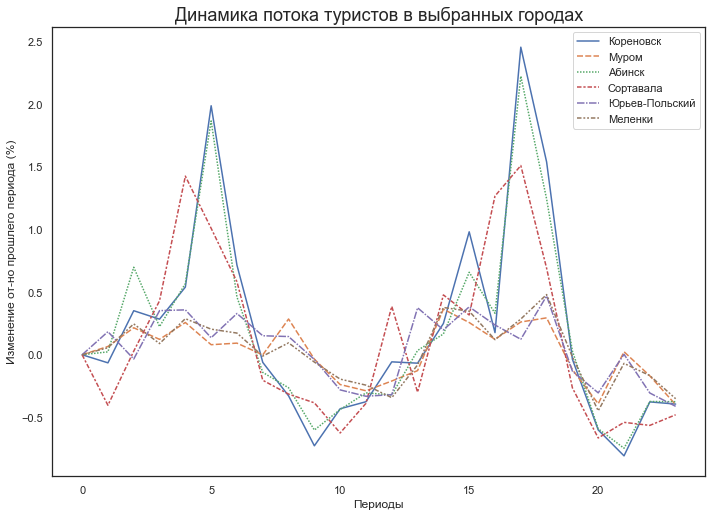

In [80]:
fig, ax = plt.subplots()
sns.lineplot(data=df_tourists_dynamics[chosen_cities])

plt.title('Динамика потока туристов в выбранных городах',fontdict={'fontsize': 18})
#add axis labels
plt.ylabel('Изменение от-но прошлего периода (%)')
plt.xlabel('Периоды')
plt.show()

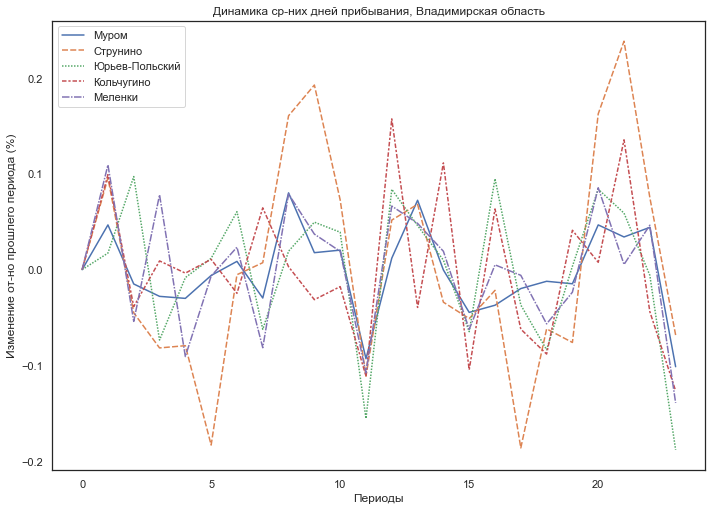

In [81]:
sns.lineplot(data=df_avgdays_dynamics[region_33])

plt.title('Динамика ср-них дней прибывания, Владимирская область')
#add axis labels
plt.ylabel('Изменение от-но прошлего периода (%)')
plt.xlabel('Периоды')
plt.show()

In [82]:
df_all_cities['Кореновск']

period  tourists  tourists_uniq  days_sum  days_mean  gender_mean  \
0        1      5830           5826     29991   5.144254     1.391943   
1        2      5453           5452     30000   5.501559     1.328247   
2        3      7371           7368     39358   5.339574     1.385644   
3        4      9467           9464     50928   5.379529     1.382664   
4        5     14582          14579     76946   5.276780     1.423959   
5        6     43587          43587    252370   5.790029     1.527817   
6        7     74772          74772    453020   6.058685     1.546738   
7        8     70216          70215    402670   5.734733     1.457273   
8        9     47170          25337    258140   5.472546     1.454592   
9       10     12858           7044     63793   4.961347     1.342818   
10      11      7311           4049     38530   5.270141     1.223917   
11      12      4568           2524     21892   4.792469     1.179709   
12      13      4309           4307     20370   4.727315     1.350296   
13      14      4019           4019     19414   4.830555     1.272934   
14      15      5022           5022     25241   5.026085     1.308209   
15      16      9954           9953     52068   5.230862     1.391839   
16      17     11715          11715     59945   5.116944     1.394692   
17      18     40499          40498    227510   5.617670     1.475157   
18      19    102874         102873    593799   5.772100     1.464458   
19      20     99130          99129    556433   5.613165     1.463600   
20      21     39580          39576    212987   5.381177     1.419036   
21      22      7608           7608     38956   5.120400     1.281187   
22      23      4743           4742     24106   5.082437     1.207684   
23      24      2874           2874     13616   4.737648     1.165996   

     age_mean         mou     mou_out           dou       city  period12  \
0   36.098409  586.178661  345.601814  15708.370855  Кореновск         1   
1   36.490894  613.936807  363.225836  14282.833093  Кореновск         2   
2   37.054930  634.300917  378.323758  15591.111801  Кореновск         3   
3   37.055769  629.205935  367.657357  15266.371449  Кореновск         4   
4   36.348273  568.985808  333.594515  15985.174860  Кореновск         5   
5   35.509845  488.386566  285.015209  14132.544698  Кореновск         6   
6   35.827051  479.030538  276.479072  15430.966229  Кореновск         7   
7   36.679641  469.915101  272.403947  15016.015025  Кореновск         8   
8   38.289604  489.169491  282.787595  13525.409866  Кореновск         9   
9   36.569174  576.270909  347.226280  17243.727309  Кореновск        10   
10  36.179859  605.132131  374.676724  17556.845226  Кореновск        11   
11  36.268284  625.958717  386.440084  19061.159899  Кореновск        12   
12  35.543032  543.067589  324.269841  18507.602312  Кореновск         1   
13  35.885944  553.541140  337.567736  16828.148454  Кореновск         2   
14  35.994252  596.558479  369.843628  18324.991543  Кореновск         3   
15  36.031579  562.024533  335.184409  16737.120921  Кореновск         4   
16  36.119863  530.589599  314.120034  17069.862782  Кореновск         5   
17  35.809997  472.787895  276.414431  15780.303830  Кореновск         6   
18  35.670852  456.917692  264.867253  17006.232614  Кореновск         7   
19  36.210569  460.381437  266.482864  16588.739492  Кореновск         8   
20  36.336696  480.433934  277.085945  14679.397475  Кореновск         9   
21  35.069136  532.827605  318.698252  18141.002576  Кореновск        10   
22  34.808162  569.199719  349.831693  18533.539622  Кореновск        11   
23  34.793849  573.480595  354.957061  19068.556652  Кореновск        12   

        month     month_sin     month_cos  
0     January  5.000000e-01  8.660254e-01  
1    February  8.660254e-01  5.000000e-01  
2       March  1.000000e+00  6.123234e-17  
3       April  8.660254e-01 -5.000000e-01  
4         May  5.000000e-01 -8.660254e-01  
5        June

In [83]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [84]:
for name in chosen_cities:
    
    print(name)
    print()
    print(color.BOLD + 'Information about dynamics' + color.END)
    x1=df_all_cities[name]['tourists'].iloc[0:5].sum()
    x2=df_all_cities[name]['tourists'].iloc[8:12].sum()
    
    x3=df_all_cities[name]['tourists'].iloc[12:17].sum()
    x4=df_all_cities[name]['tourists'].iloc[20:24].sum()
    
    print("Relation of pre-summer monthes to the sum of all monther except summer 2021:", x1/(x1+x2))
    print("Relation of pre-summer monthes to the sum of all monther except summer 2022:", x3/(x3+x4))
    print()
    
    x11=df_all_cities[name]['tourists'].iloc[0:5].sum()
    x21=df_all_cities[name]['tourists'].iloc[9:12].sum()
    
    x31=df_all_cities[name]['tourists'].iloc[12:17].sum()
    x41=df_all_cities[name]['tourists'].iloc[21:24].sum()
    
    print("Relation of pre-summer monthes to the sum of all monther except summer and september 2021:", x11/(x11+x21))
    print("Relation of pre-summer monthes to the sum of all monther except summer and september 2022:", x31/(x31+x41))
    
    print()

Кореновск

Information about dynamics
Relation of pre-summer monthes to the sum of all monther except summer 2021: 0.37259401448390195
Relation of pre-summer monthes to the sum of all monther except summer 2022: 0.38986239757748486

Relation of pre-summer monthes to the sum of all monther except summer and september 2021: 0.633199881376038
Relation of pre-summer monthes to the sum of all monther except summer and september 2022: 0.6969787437305947

Муром

Information about dynamics
Relation of pre-summer monthes to the sum of all monther except summer 2021: 0.4263335584064821
Relation of pre-summer monthes to the sum of all monther except summer 2022: 0.5558717201166181

Relation of pre-summer monthes to the sum of all monther except summer and september 2021: 0.5186341234452007
Relation of pre-summer monthes to the sum of all monther except summer and september 2022: 0.6397605561968164

Абинск

Information about dynamics
Relation of pre-summer monthes to the sum of all monther except 

In [85]:
chosen_cities = ['Муром', 'Кореновск', 'Сортавала', 'Юрьев-Польский', 'Абинск','Меленки']

summer = [5,6,7,17,18,19]
other = [0,1,2,3,4,8,9,10,11,12,13,14,15,16,20,21,22,23]

for name in chosen_cities:
    
    print(name)
    print()
    print(color.BOLD + 'Information about dynamics' + color.END)
    x1=df_all_cities[name]['tourists'].iloc[0:12].sum()
    x2=df_all_cities[name]['tourists'].iloc[12:24].sum()

    x1_summer_sept=df_all_cities[name]['tourists'].iloc[5:9].sum()
    x2_summer_sept=df_all_cities[name]['tourists'].iloc[17:21].sum()

    print("Total tourists:", df_all_cities[name]['tourists'].sum())
    print("1st-year tourists:", x1, '|', "1st-year summer + sept tourists:", x1_summer_sept)
    print("2nd-year tourists:", x2, '|', "2nd-year summer + sept tourists:", x2_summer_sept)
    print("Absolute year change:", x2 - x1,'|', "Absolute summer+sept season change:", x2_summer_sept - x1_summer_sept)
    print("Relative year change:", round((((x2 - x1)/x1) * 100),2),"%",'|', "Relative summer +sept season change:",
          round((((x2_summer_sept - x1_summer_sept)/x1_summer_sept) * 100),2),"%")
    print()

Муром

Information about dynamics
Total tourists: 143472
1st-year tourists: 72767 | 1st-year summer + sept tourists: 30157
2nd-year tourists: 70705 | 2nd-year summer + sept tourists: 33452
Absolute year change: -2062 | Absolute summer+sept season change: 3295
Relative year change: -2.83 % | Relative summer +sept season change: 10.93 %

Кореновск

Information about dynamics
Total tourists: 635512
1st-year tourists: 303185 | 1st-year summer + sept tourists: 235745
2nd-year tourists: 332327 | 2nd-year summer + sept tourists: 282083
Absolute year change: 29142 | Absolute summer+sept season change: 46338
Relative year change: 9.61 % | Relative summer +sept season change: 19.66 %

Сортавала

Information about dynamics
Total tourists: 56610
1st-year tourists: 27123 | 1st-year summer + sept tourists: 18832
2nd-year tourists: 29487 | 2nd-year summer + sept tourists: 22930
Absolute year change: 2364 | Absolute summer+sept season change: 4098
Relative year change: 8.72 % | Relative summer +sept s

In [86]:
summer = [5,6,7,17,18,19]
other = [0,1,2,3,4,8,9,10,11,12,13,14,15,16,20,21,22,23]

for name in region_33:
    
    print(name)
    print()
    print(color.BOLD + 'Information about dynamics' + color.END)
    x1=df_all_cities[name]['tourists'].iloc[0:12].sum()
    x2=df_all_cities[name]['tourists'].iloc[12:24].sum()

    x1_summer=df_all_cities[name]['tourists'].iloc[5:8].sum()
    x2_summer=df_all_cities[name]['tourists'].iloc[17:20].sum()

    print("Total tourists:", df_all_cities[name]['tourists'].sum())
    print("1st-year tourists:", x1, '|', "1st-year summer tourists:", x1_summer)
    print("2nd-year tourists:", x2, '|', "2nd-year summer tourists:", x2_summer)
    print("Absolute year change:", x2 - x1,'|', "Absolute summer season change:", x2_summer - x1_summer)
    print("Relative year change:", round((((x2 - x1)/x1) * 100),2),"%",'|', "Relative summer season change:",
          round((((x2_summer - x1_summer)/x1_summer) * 100),2),"%")
    print()
    
    m_g = (2 - df_append_2021[df_append_2021['city'] == name]['gender'].mean())*100
    f_g = 100 - m_g
    m_g_2 = (2 - df_append_2022[df_append_2022['city'] == name]['gender'].mean())*100
    f_g_2 = 100 - m_g_2
    print(color.BOLD + 'Tourists characteristics' + color.END)
    print('Proportion of male and female tourists (2021): ', 'Male:', round(m_g,2),"%", 'Female:', round(f_g,2),"%")
    print('Proportion of male and female tourists (2022): ', 'Male:', round(m_g_2,2),"%", 'Female:', round(f_g_2,2),"%")
    
    sum_summer = 0
    sum_tourists_summer = df_all_cities[name]['tourists'].iloc[summer].sum()
    sum_other = 0
    sum_tourists_other = df_all_cities[name]['tourists'].iloc[other].sum()
    
    age_summ_summer = 0
    age_summ_other = 0
    
    mou_sum_summer = 0
    mou_sum_other = 0
    
    mou_out_sum_summer = 0
    mou_out_sum_other = 0
    
    dou_sum_summer = 0
    dou_sum_other = 0
    
    days_sum_summer =0
    days_sum_other =0
    for i in summer:
        x = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['gender_mean'].iloc[i]
        sum_summer = sum_summer + x
        
        x_age = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['age_mean'].iloc[i]
        age_summ_summer = age_summ_summer + x_age
        
        x_mou = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['mou'].iloc[i]
        mou_sum_summer = mou_sum_summer + x_mou
        
        x_mou_out = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['mou_out'].iloc[i]
        mou_out_sum_summer = mou_out_sum_summer + x_mou_out
        
        x_dou = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['dou'].iloc[i]
        dou_sum_summer = dou_sum_summer + x_dou
        
        x_days = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['days_mean'].iloc[i]
        days_sum_summer = days_sum_summer + x_days
    for i in other:
        x_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['gender_mean'].iloc[i]
        sum_other = sum_other + x_other

        x_age_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['age_mean'].iloc[i]
        age_summ_other = age_summ_other + x_age_other
        
        x_mou_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['mou'].iloc[i]
        mou_sum_other= mou_sum_other + x_mou_other
        
        x_mou_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['mou_out'].iloc[i]
        mou_out_sum_other = mou_out_sum_other + x_mou_other
        
        x_dou_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['dou'].iloc[i]
        dou_sum_other = dou_sum_other + x_dou_other
        
        x_days_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['days_mean'].iloc[i]
        days_sum_other = days_sum_other + x_days_other
    
    avg_day_summer = days_sum_summer/sum_tourists_summer
    avg_day_other = days_sum_other/sum_tourists_other
    
    avg_dou_summer = dou_sum_summer/sum_tourists_summer
    avg_dou_other = dou_sum_other/sum_tourists_other
    
    avg_mou_summer = mou_sum_summer/sum_tourists_summer
    avg_mou_out_summer = mou_out_sum_summer/sum_tourists_summer
    avg_mou_other = mou_sum_other/sum_tourists_other
    avg_mou_out_other = mou_out_sum_other/sum_tourists_other
        
    average_age_summer = age_summ_summer/sum_tourists_summer
    average_age_other = age_summ_other/sum_tourists_other
        
    average_gender_summer = sum_summer/sum_tourists_summer
    average_gender_other = sum_other/sum_tourists_other
    m_s = (2 - average_gender_summer)*100
    f_s = 100 - m_s
    m_o= (2 - average_gender_other)*100
    f_o = 100 - m_o
    
    print('Proportion of male and female tourists (summer months): ',
          'Male:', round(m_s,2),"%", 'Female:', round(f_s,2),"%")
    print('Proportion of male and female tourists (other months): ',
          'Male:', round(m_o,2),"%", 'Female:', round(f_o,2),"%")
    
    
    print("Average age (summer months):", round(average_age_summer,2))
    print("Average age (other months):", round(average_age_other,2))
    print("Average time spent in the city in days (2021):", 
          round(df_append_2021[df_append_2021['city'] == name]['days'].mean(),2))
    print("Average time spent in the city in days (2022):",
         round(df_append_2022[df_append_2022['city'] == name]['days'].mean(),2))
    print("Average time spent in the city in days (summer months):", round(avg_day_summer,2))
    print("Average time spent in the city in days (other months):", round(avg_day_other,2))
    print()
    print("Top 10 home regions of the tourists: region index and amount of tourists (2022)")
    print(df_append_2022[df_append_2022['city'] == name]['home_region'].value_counts().head(10))
    print()
    print(color.BOLD + 'Tourists digital characteristics' + color.END)
    print("The median amont of voice traffic per month in minutes (2021 | 2022):",
          round(df_append_2021[df_append_2021['city'] == name]['mou'].median(),2), "|",
          round(df_append_2022[df_append_2022['city'] == name]['mou'].median(),2))
    print("The median amont of OUTGOING voice traffic per month in minutes (2021 | 2022):",
          round(df_append_2021[df_append_2021['city'] == name]['mou_out'].median(),2), "|",
          round(df_append_2022[df_append_2022['city'] == name]['mou_out'].median(),2))
    print("The average amont of voice traffic in minutes (summer months):", round(avg_mou_summer,2))
    print("The average amont of voice traffic in minutes (other months):", round(avg_mou_other,2))
    print("The average amont of OUTGOING voice traffic in minutes (summer months):", round(avg_mou_out_summer,2))
    print("The average amont of OUTGOING voice traffic in minutes (other months):", round(avg_mou_out_other,2))
    print()
    print("The median amont of internet traffic per month in MB (2021 | 2022):",
          round(df_append_2021[df_append_2021['city'] == name]['dou'].median(),2), "|",
          round(df_append_2022[df_append_2022['city'] == name]['dou'].median(),2))
    print("The average amont of internet traffic in MB (summer months):", round(avg_dou_summer,2))
    print("The average amont of internet traffic in MB (other months):", round(avg_dou_other,2))
    print()
    print("Median subscriber traffic during presence at the city, MB (2022):",
         round(df_append_2022[df_append_2022['city'] == name]['volume_sum'].median(),2))
    print("Median subscriber traffic during presence at the city (uplink), MB (2022):",
         round(df_append_2022[df_append_2022['city'] == name]['ul_volume_sum'].median(),2))
    print("Median subscriber traffic during presence at the city (downlink), MB (2022):",
         round(df_append_2022[df_append_2022['city'] == name]['dl_volume_sum'].median(),2))
    print()
    print("Top 10 Interests: categoty and amount of tourists (2022):")
    print(df_append_2022[df_append_2022['city'] == name]['interests'].value_counts().head(10))
    print()
    print("Top 10 urls: url and amount of tourists (2022):")
    print(df_append_2022[df_append_2022['city'] == name]['top_service'].value_counts().head(10))
    print()

Муром

Information about dynamics
Total tourists: 143472
1st-year tourists: 72767 | 1st-year summer tourists: 20932
2nd-year tourists: 70705 | 2nd-year summer tourists: 27830
Absolute year change: -2062 | Absolute summer season change: 6898
Relative year change: -2.83 % | Relative summer season change: 32.95 %

Tourists characteristics
Proportion of male and female tourists (2021):  Male: 56.37 % Female: 43.63 %
Proportion of male and female tourists (2022):  Male: 56.73 % Female: 43.27 %
Proportion of male and female tourists (summer months):  Male: 52.19 % Female: 47.81 %
Proportion of male and female tourists (other months):  Male: 58.85 % Female: 41.15 %
Average age (summer months): 36.77
Average age (other months): 36.72
Average time spent in the city in days (2021): 9.04
Average time spent in the city in days (2022): 8.73
Average time spent in the city in days (summer months): 8.51
Average time spent in the city in days (other months): 9.08

Top 10 home regions of the tourists: r

[Навигация]                        151
[Маркетплейсы]                     107
[Продуктовые сети]                  94
[Покупка техники и электроники]     68
[Видеоигры и игровые сервисы]       67
[Фильмы и сериалы, ТВ]              55
[Одежда и обувь]                    54
[Передача и хранение данных]        54
[Такси, Навигация]                  49
[Навигация, Такси]                  48
Name: interests, dtype: int64

Top 10 urls: url and amount of tourists (2022):
[dns]           3584
[existing]      3236
[vkontakte]     1939
[tiktok]        1528
[yandex]        1320
[kinopoisk]     1219
[google]         809
[youtube]        681
[unknowntcp]     625
[whatsapp]       521
Name: top_service, dtype: int64

Кольчугино

Information about dynamics
Total tourists: 22068
1st-year tourists: 10279 | 1st-year summer tourists: 3309
2nd-year tourists: 11789 | 2nd-year summer tourists: 5135
Absolute year change: 1510 | Absolute summer season change: 1826
Relative year change: 14.69 % | Relative summe

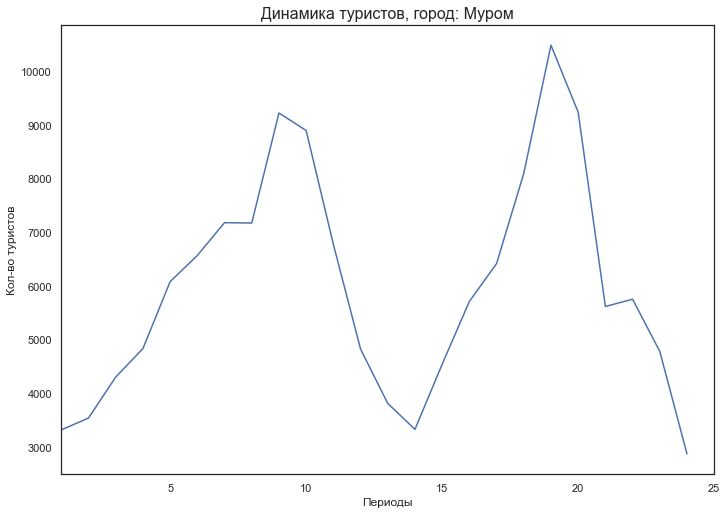

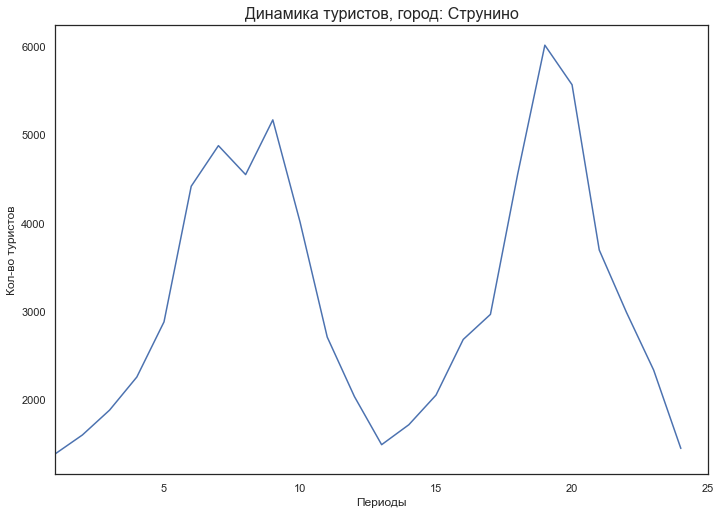

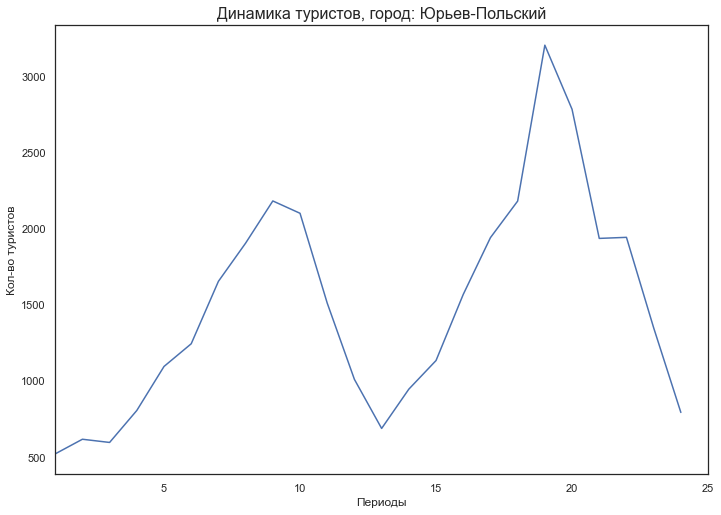

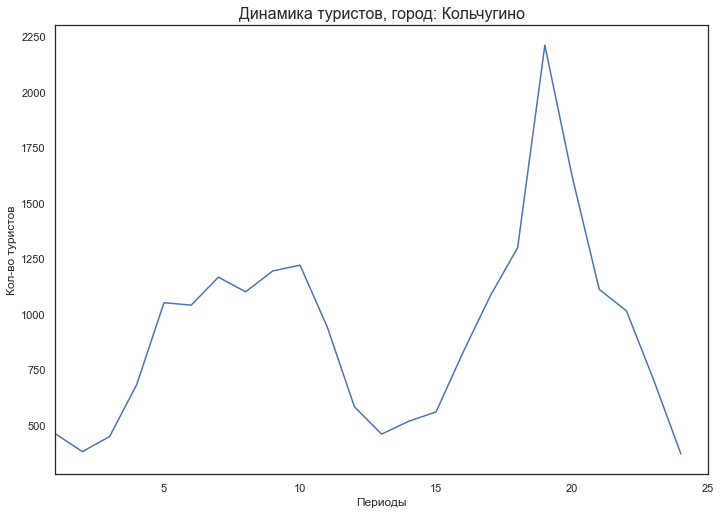

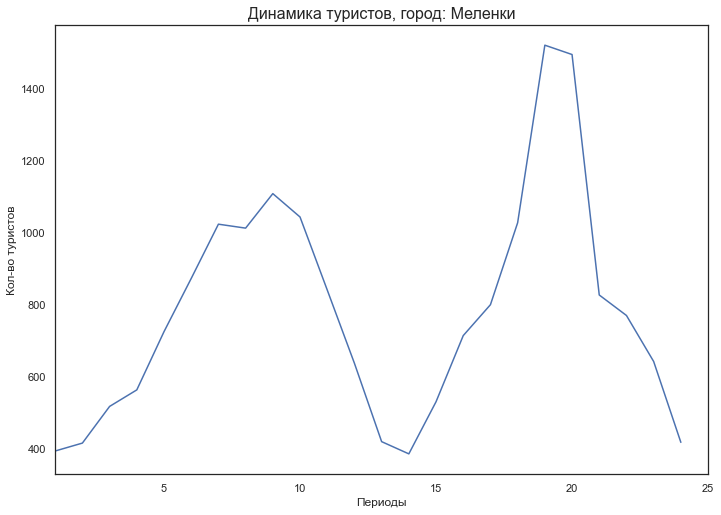

In [87]:
for name in region_33:
    fig, ax = plt.subplots()
    sns.lineplot(x = df_all_cities[name]['period'], y = df_all_cities[name]['tourists'],
                     ax=ax)  
    ax.set_xlim(1,25)
    #ax.set_ylim(0,50000)
    plt.title('Динамика туристов, город: {}'.format(name), fontsize=16)
    #add axis labels
    plt.ylabel('Кол-во туристов')
    plt.xlabel('Периоды')
    plt.show()

# Краснодарский край

In [88]:
region_23_update = ['Кореновск', 'Туапсе', 'Славянск-на-Кубани', 'Крымск',
            'Армавир', 'Кропоткин', 'Абинск', 'Курганинск', 'Хадыженск']

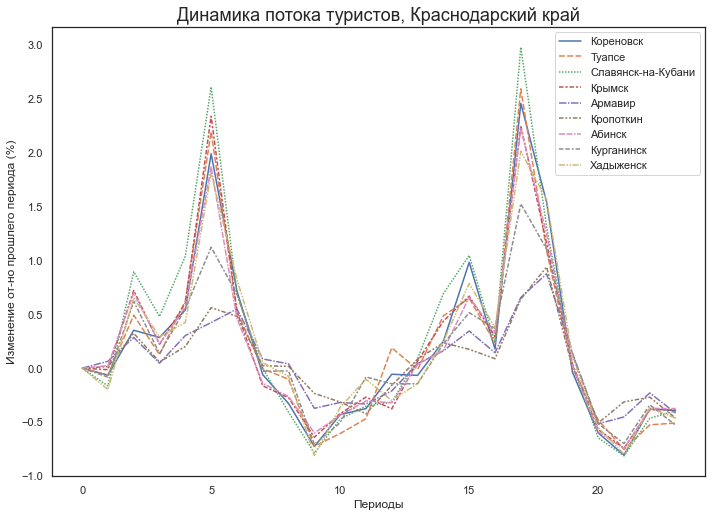

In [89]:
fig, ax = plt.subplots()
sns.lineplot(data=df_tourists_dynamics[region_23_update])

plt.title('Динамика потока туристов, Краснодарский край',fontdict={'fontsize': 18})
#add axis labels
plt.ylabel('Изменение от-но прошлего периода (%)')
plt.xlabel('Периоды')
plt.show()

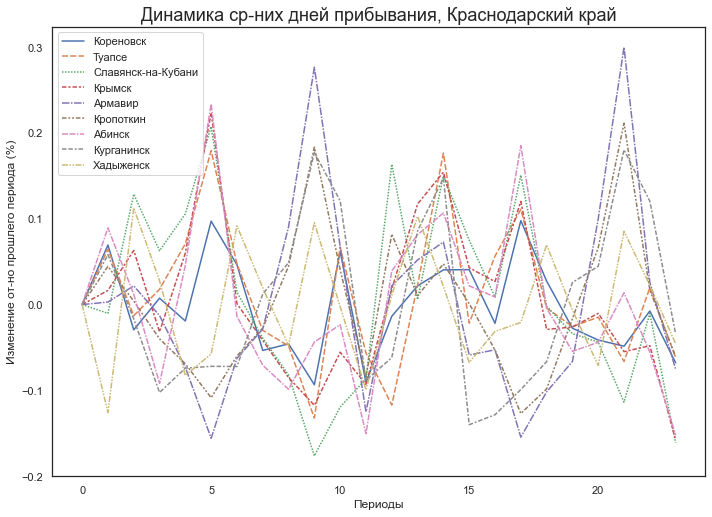

In [90]:
fig, ax = plt.subplots()
sns.lineplot(data=df_avgdays_dynamics[region_23_update])

plt.title('Динамика ср-них дней прибывания, Краснодарский край',fontdict={'fontsize': 18})
#add axis labels
plt.ylabel('Изменение от-но прошлего периода (%)')
plt.xlabel('Периоды')
plt.show()

Making table in spread sheet

In [91]:
prefinal_cities_list = ['Кореновск', 'Туапсе', 'Славянск-на-Кубани', 'Крымск',
            'Армавир', 'Кропоткин', 'Абинск', 'Курганинск', 'Хадыженск',
            'Муром', 'Струнино', 'Юрьев-Польский', 'Кольчугино', 'Меленки',
            'Горно-Алтайск', 'Байкальск', 'Сортавала']

In [92]:
for name in region_23_update:
    
    print(name)
    print()
    print(color.BOLD + 'Information about dynamics' + color.END)
    x1=df_all_cities[name]['tourists'].iloc[0:12].sum()
    x2=df_all_cities[name]['tourists'].iloc[12:24].sum()

    x1_summer=df_all_cities[name]['tourists'].iloc[5:8].sum()
    x2_summer=df_all_cities[name]['tourists'].iloc[17:20].sum()

    print("Total tourists:", df_all_cities[name]['tourists'].sum())
    print("1st-year tourists:", x1, '|', "1st-year summer tourists:", x1_summer)
    print("2nd-year tourists:", x2, '|', "2nd-year summer tourists:", x2_summer)
    print("Absolute year change:", x2 - x1,'|', "Absolute summer season change:", x2_summer - x1_summer)
    print("Relative year change:", round((((x2 - x1)/x1) * 100),2),"%",'|', "Relative summer season change:",
          round((((x2_summer - x1_summer)/x1_summer) * 100),2),"%")
    print()
    
    m_g = (2 - df_append_2021[df_append_2021['city'] == name]['gender'].mean())*100
    f_g = 100 - m_g
    m_g_2 = (2 - df_append_2022[df_append_2022['city'] == name]['gender'].mean())*100
    f_g_2 = 100 - m_g_2
    print(color.BOLD + 'Tourists characteristics' + color.END)
    print('Proportion of male and female tourists (2021): ', 'Male:', round(m_g,2),"%", 'Female:', round(f_g,2),"%")
    print('Proportion of male and female tourists (2022): ', 'Male:', round(m_g_2,2),"%", 'Female:', round(f_g_2,2),"%")
    
    sum_tourists_summer = df_all_cities[name]['tourists'].iloc[summer].sum()
    sum_tourists_other = df_all_cities[name]['tourists'].iloc[other].sum()

    days_sum_summer =0
    days_sum_other =0
    for i in summer:
        x_days = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['days_mean'].iloc[i]
        days_sum_summer = days_sum_summer + x_days
    for i in other:     
        x_days_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['days_mean'].iloc[i]
        days_sum_other = days_sum_other + x_days_other
    
    avg_day_summer = days_sum_summer/sum_tourists_summer
    avg_day_other = days_sum_other/sum_tourists_other
    

Кореновск

Information about dynamics
Total tourists: 635512
1st-year tourists: 303185 | 1st-year summer tourists: 188575
2nd-year tourists: 332327 | 2nd-year summer tourists: 242503
Absolute year change: 29142 | Absolute summer season change: 53928
Relative year change: 9.61 % | Relative summer season change: 28.6 %

Tourists characteristics
Proportion of male and female tourists (2021):  Male: 53.39 % Female: 46.61 %
Proportion of male and female tourists (2022):  Male: 56.0 % Female: 44.0 %
Туапсе

Information about dynamics
Total tourists: 496418
1st-year tourists: 237624 | 1st-year summer tourists: 138876
2nd-year tourists: 258794 | 2nd-year summer tourists: 177613
Absolute year change: 21170 | Absolute summer season change: 38737
Relative year change: 8.91 % | Relative summer season change: 27.89 %

Tourists characteristics
Proportion of male and female tourists (2021):  Male: 46.04 % Female: 53.96 %
Proportion of male and female tourists (2022):  Male: 50.08 % Female: 49.92 %
Сл

In [93]:
region = ['Горно-Алтайск']
region1 = ['Сортавала']

In [94]:
summer = [5,6,7,17,18,19]
other = [0,1,2,3,4,8,9,10,11,12,13,14,15,16,20,21,22,23]

for name in region_23_update:
    
    print(name)
    print()
    print(color.BOLD + 'Information about dynamics' + color.END)
    x1=df_all_cities[name]['tourists'].iloc[0:12].sum()
    x2=df_all_cities[name]['tourists'].iloc[12:24].sum()

    x1_summer=df_all_cities[name]['tourists'].iloc[5:8].sum()
    x2_summer=df_all_cities[name]['tourists'].iloc[17:20].sum()

    print("Total tourists:", df_all_cities[name]['tourists'].sum())
    print("1st-year tourists:", x1, '|', "1st-year summer tourists:", x1_summer)
    print("2nd-year tourists:", x2, '|', "2nd-year summer tourists:", x2_summer)
    print("Absolute year change:", x2 - x1,'|', "Absolute summer season change:", x2_summer - x1_summer)
    print("Relative year change:", round((((x2 - x1)/x1) * 100),2),"%",'|', "Relative summer season change:",
          round((((x2_summer - x1_summer)/x1_summer) * 100),2),"%")
    print()
    
    m_g = (2 - df_append_2021[df_append_2021['city'] == name]['gender'].mean())*100
    f_g = 100 - m_g
    m_g_2 = (2 - df_append_2022[df_append_2022['city'] == name]['gender'].mean())*100
    f_g_2 = 100 - m_g_2
    print(color.BOLD + 'Tourists characteristics' + color.END)
    print('Proportion of male and female tourists (2021): ', 'Male:', round(m_g,2),"%", 'Female:', round(f_g,2),"%")
    print('Proportion of male and female tourists (2022): ', 'Male:', round(m_g_2,2),"%", 'Female:', round(f_g_2,2),"%")
    
    sum_summer = 0
    sum_tourists_summer = df_all_cities[name]['tourists'].iloc[summer].sum()
    sum_other = 0
    sum_tourists_other = df_all_cities[name]['tourists'].iloc[other].sum()
    
    age_summ_summer = 0
    age_summ_other = 0
    
    mou_sum_summer = 0
    mou_sum_other = 0
    
    mou_out_sum_summer = 0
    mou_out_sum_other = 0
    
    dou_sum_summer = 0
    dou_sum_other = 0
    
    days_sum_summer =0
    days_sum_other =0
    for i in summer:
        x = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['gender_mean'].iloc[i]
        sum_summer = sum_summer + x
        
        x_age = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['age_mean'].iloc[i]
        age_summ_summer = age_summ_summer + x_age
        
        x_mou = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['mou'].iloc[i]
        mou_sum_summer = mou_sum_summer + x_mou
        
        x_mou_out = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['mou_out'].iloc[i]
        mou_out_sum_summer = mou_out_sum_summer + x_mou_out
        
        x_dou = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['dou'].iloc[i]
        dou_sum_summer = dou_sum_summer + x_dou
        
        x_days = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['days_mean'].iloc[i]
        days_sum_summer = days_sum_summer + x_days
    for i in other:
        x_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['gender_mean'].iloc[i]
        sum_other = sum_other + x_other

        x_age_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['age_mean'].iloc[i]
        age_summ_other = age_summ_other + x_age_other
        
        x_mou_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['mou'].iloc[i]
        mou_sum_other= mou_sum_other + x_mou_other
        
        x_mou_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['mou_out'].iloc[i]
        mou_out_sum_other = mou_out_sum_other + x_mou_other
        
        x_dou_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['dou'].iloc[i]
        dou_sum_other = dou_sum_other + x_dou_other
        
        x_days_other = df_all_cities[name]['tourists'].iloc[i] * df_all_cities[name]['days_mean'].iloc[i]
        days_sum_other = days_sum_other + x_days_other
    
    avg_day_summer = days_sum_summer/sum_tourists_summer
    avg_day_other = days_sum_other/sum_tourists_other
    
    avg_dou_summer = dou_sum_summer/sum_tourists_summer
    avg_dou_other = dou_sum_other/sum_tourists_other
    
    avg_mou_summer = mou_sum_summer/sum_tourists_summer
    avg_mou_out_summer = mou_out_sum_summer/sum_tourists_summer
    avg_mou_other = mou_sum_other/sum_tourists_other
    avg_mou_out_other = mou_out_sum_other/sum_tourists_other
        
    average_age_summer = age_summ_summer/sum_tourists_summer
    average_age_other = age_summ_other/sum_tourists_other
        
    average_gender_summer = sum_summer/sum_tourists_summer
    average_gender_other = sum_other/sum_tourists_other
    m_s = (2 - average_gender_summer)*100
    f_s = 100 - m_s
    m_o= (2 - average_gender_other)*100
    f_o = 100 - m_o
    
    print('Proportion of male and female tourists (summer months): ',
          'Male:', round(m_s,2),"%", 'Female:', round(f_s,2),"%")
    print('Proportion of male and female tourists (other months): ',
          'Male:', round(m_o,2),"%", 'Female:', round(f_o,2),"%")
    
    
    print("Average age (summer months):", round(average_age_summer,2))
    print("Average age (other months):", round(average_age_other,2))
    print("Average time spent in the city in days (2021):", 
          round(df_append_2021[df_append_2021['city'] == name]['days'].mean(),2))
    print("Average time spent in the city in days (2022):",
         round(df_append_2022[df_append_2022['city'] == name]['days'].mean(),2))
    print("Average time spent in the city in days (summer months):", round(avg_day_summer,2))
    print("Average time spent in the city in days (other months):", round(avg_day_other,2))
    print()
    print("Top 10 home regions of the tourists: region index and amount of tourists (2022)")
    print(df_append_2022[df_append_2022['city'] == name]['home_region'].value_counts().head(10))
    print()
    print(color.BOLD + 'Tourists digital characteristics' + color.END)
    print("The median amont of voice traffic per month in minutes (2021 | 2022):",
          round(df_append_2021[df_append_2021['city'] == name]['mou'].median(),2), "|",
          round(df_append_2022[df_append_2022['city'] == name]['mou'].median(),2))
    print("The median amont of OUTGOING voice traffic per month in minutes (2021 | 2022):",
          round(df_append_2021[df_append_2021['city'] == name]['mou_out'].median(),2), "|",
          round(df_append_2022[df_append_2022['city'] == name]['mou_out'].median(),2))
    print("The average amont of voice traffic in minutes (summer months):", round(avg_mou_summer,2))
    print("The average amont of voice traffic in minutes (other months):", round(avg_mou_other,2))
    print("The average amont of OUTGOING voice traffic in minutes (summer months):", round(avg_mou_out_summer,2))
    print("The average amont of OUTGOING voice traffic in minutes (other months):", round(avg_mou_out_other,2))
    print()
    print("The median amont of internet traffic per month in MB (2021 | 2022):",
          round(df_append_2021[df_append_2021['city'] == name]['dou'].median(),2), "|",
          round(df_append_2022[df_append_2022['city'] == name]['dou'].median(),2))
    print("The average amont of internet traffic in MB (summer months):", round(avg_dou_summer,2))
    print("The average amont of internet traffic in MB (other months):", round(avg_dou_other,2))
    print()
    print("Median subscriber traffic during presence at the city, MB (2022):",
         round(df_append_2022[df_append_2022['city'] == name]['volume_sum'].median(),2))
    print("Median subscriber traffic during presence at the city (uplink), MB (2022):",
         round(df_append_2022[df_append_2022['city'] == name]['ul_volume_sum'].median(),2))
    print("Median subscriber traffic during presence at the city (downlink), MB (2022):",
         round(df_append_2022[df_append_2022['city'] == name]['dl_volume_sum'].median(),2))
    print()
    print("Top 10 Interests: categoty and amount of tourists (2022):")
    print(df_append_2022[df_append_2022['city'] == name]['interests'].value_counts().head(10))
    print()
    print("Top 10 urls: url and amount of tourists (2022):")
    print(df_append_2022[df_append_2022['city'] == name]['top_service'].value_counts().head(10))
    print()

Кореновск

Information about dynamics
Total tourists: 635512
1st-year tourists: 303185 | 1st-year summer tourists: 188575
2nd-year tourists: 332327 | 2nd-year summer tourists: 242503
Absolute year change: 29142 | Absolute summer season change: 53928
Relative year change: 9.61 % | Relative summer season change: 28.6 %

Tourists characteristics
Proportion of male and female tourists (2021):  Male: 53.39 % Female: 46.61 %
Proportion of male and female tourists (2022):  Male: 56.0 % Female: 44.0 %
Proportion of male and female tourists (summer months):  Male: 51.52 % Female: 48.48 %
Proportion of male and female tourists (other months):  Male: 61.9 % Female: 38.1 %
Average age (summer months): 35.98
Average age (other months): 36.69
Average time spent in the city in days (2021): 5.67
Average time spent in the city in days (2022): 5.55
Average time spent in the city in days (summer months): 5.77
Average time spent in the city in days (other months): 5.26

Top 10 home regions of the tourists

Median subscriber traffic during presence at the city (uplink), MB (2022): 105911744.0
Median subscriber traffic during presence at the city (downlink), MB (2022): 641976255.0

Top 10 Interests: categoty and amount of tourists (2022):
[Навигация]                                2252
[Видеоигры и игровые сервисы]              2100
[Продуктовые сети]                         1021
[Маркетплейсы]                              942
[Одежда и обувь]                            902
[Покупка техники и электроники]             779
[Сайты знакомств]                           600
[Мобильная связь и интернет]                510
[Государственный информационный портал]     469
[Активный отдых]                            456
Name: interests, dtype: int64

Top 10 urls: url and amount of tourists (2022):
[dns]           24235
[existing]      23615
[vkontakte]     23178
[tiktok]        14327
[yandex]        13930
[google]        11010
[kinopoisk]      8494
[whatsapp]       7092
[youtube]        5316
[unknown

77.0    13804
26.0    11470
61.0    10802
30.0     8849
34.0     4980
7.0      4804
9.0      4234
20.0     4228
63.0     3925
64.0     3000
Name: home_region, dtype: int64

Tourists digital characteristics
The median amont of voice traffic per month in minutes (2021 | 2022): 408.95 | 363.3
The median amont of OUTGOING voice traffic per month in minutes (2021 | 2022): 256.11 | 232.2
The average amont of voice traffic in minutes (summer months): 489.57
The average amont of voice traffic in minutes (other months): 565.49
The average amont of OUTGOING voice traffic in minutes (summer months): 290.08
The average amont of OUTGOING voice traffic in minutes (other months): 340.76

The median amont of internet traffic per month in MB (2021 | 2022): 7667.68 | 8765.26
The average amont of internet traffic in MB (summer months): 17049.59
The average amont of internet traffic in MB (other months): 17176.45

Median subscriber traffic during presence at the city, MB (2022): 808689790.0
Median subscri

Tourists characteristics
Proportion of male and female tourists (2021):  Male: 47.9 % Female: 52.1 %
Proportion of male and female tourists (2022):  Male: 51.0 % Female: 49.0 %
Proportion of male and female tourists (summer months):  Male: 47.08 % Female: 52.92 %
Proportion of male and female tourists (other months):  Male: 54.02 % Female: 45.98 %
Average age (summer months): 37.43
Average age (other months): 39.46
Average time spent in the city in days (2021): 4.94
Average time spent in the city in days (2022): 5.02
Average time spent in the city in days (summer months): 5.0
Average time spent in the city in days (other months): 4.94

Top 10 home regions of the tourists: region index and amount of tourists (2022)
26.0    5587
61.0    2875
77.0    2724
63.0    1277
9.0     1177
7.0      939
16.0     806
78.0     755
15.0     720
73.0     700
Name: home_region, dtype: int64

Tourists digital characteristics
The median amont of voice traffic per month in minutes (2021 | 2022): 345.31 | 3

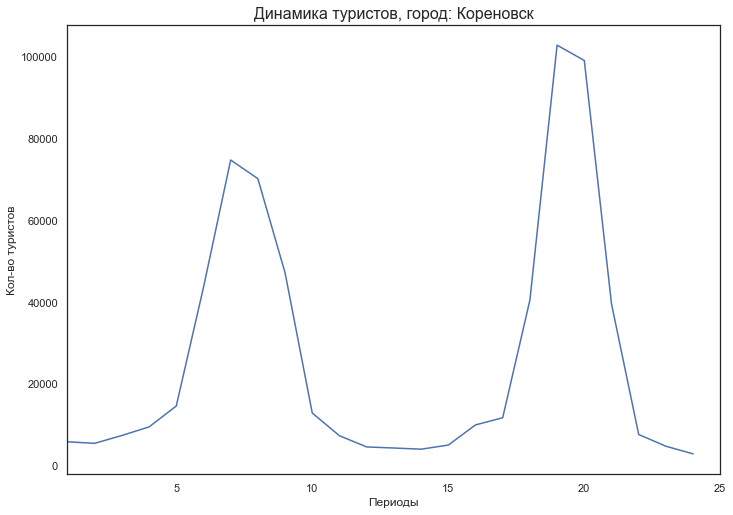

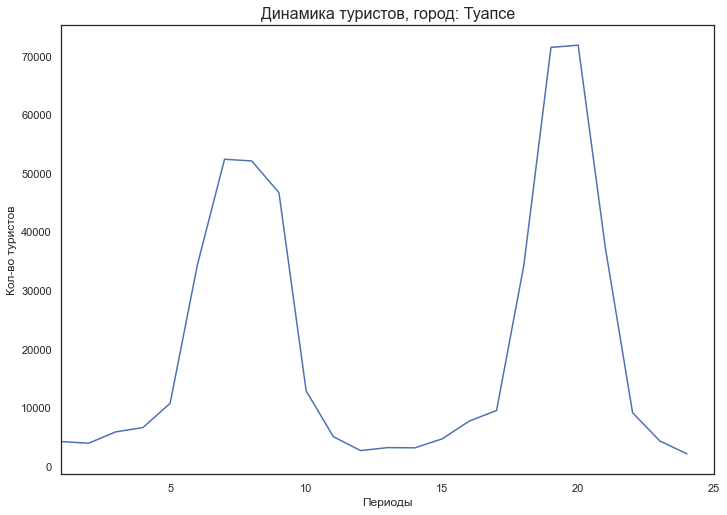

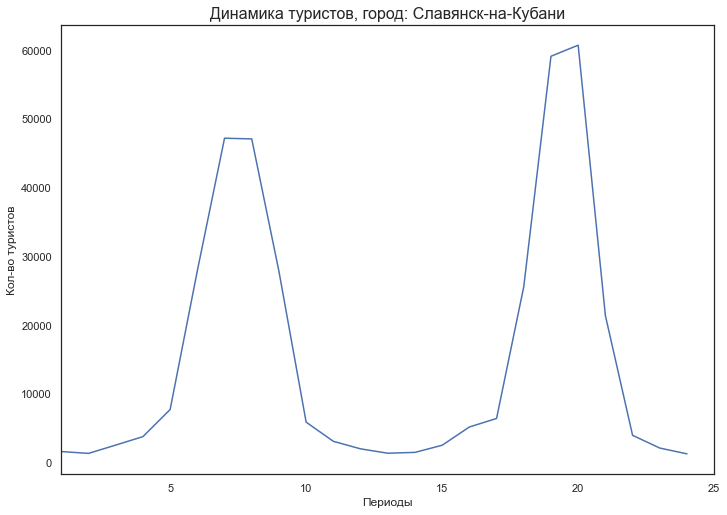

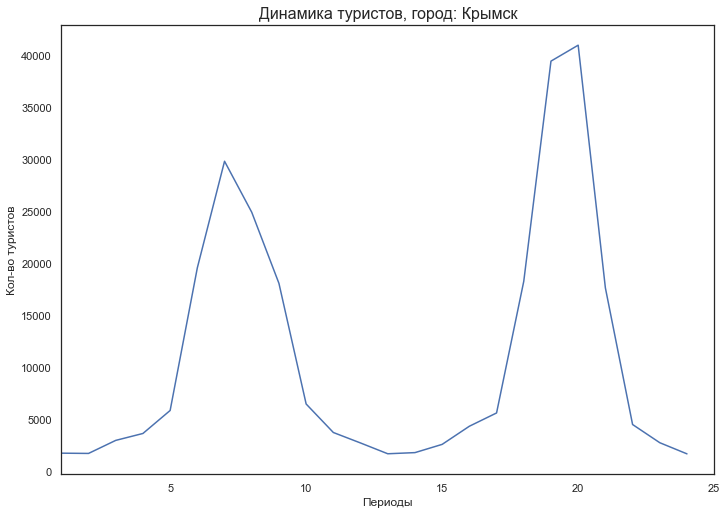

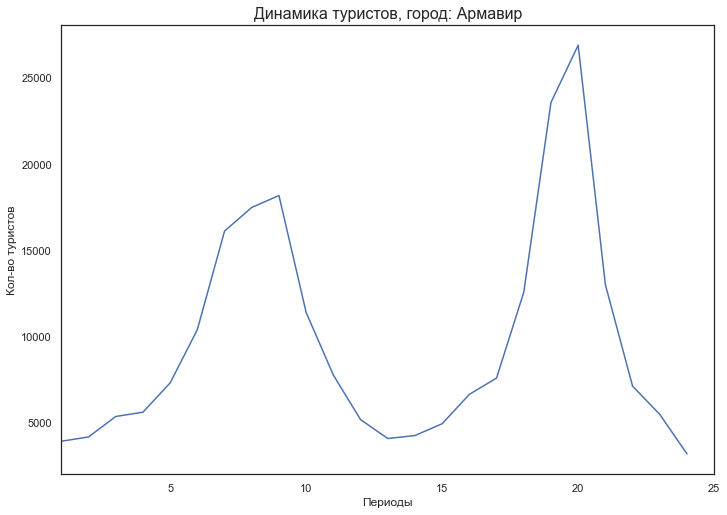

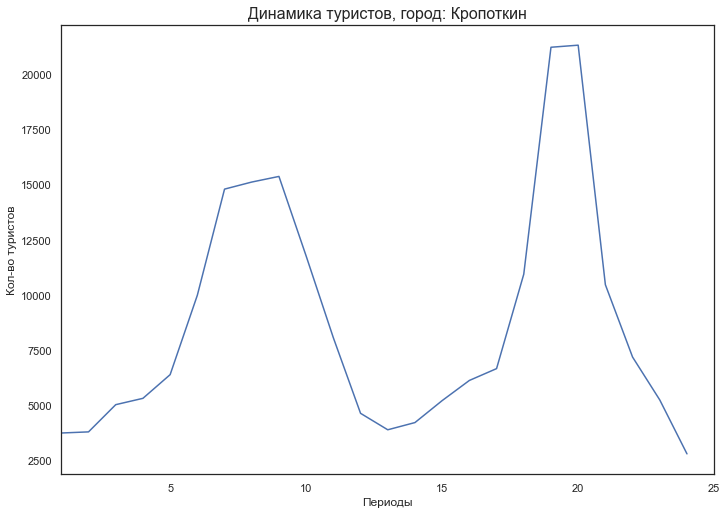

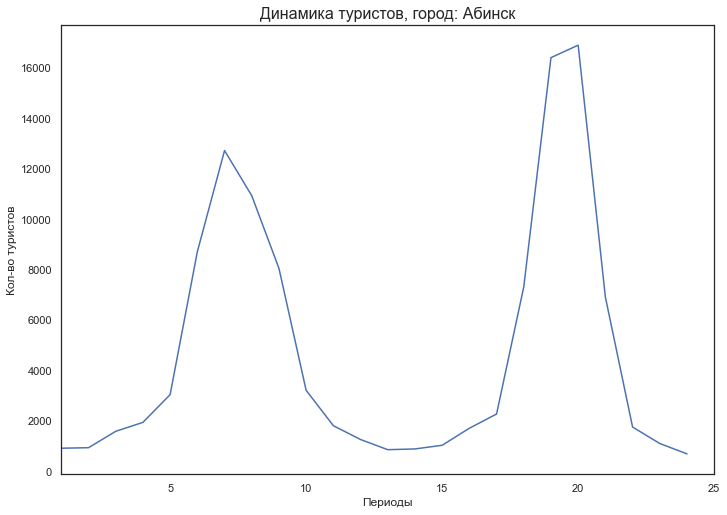

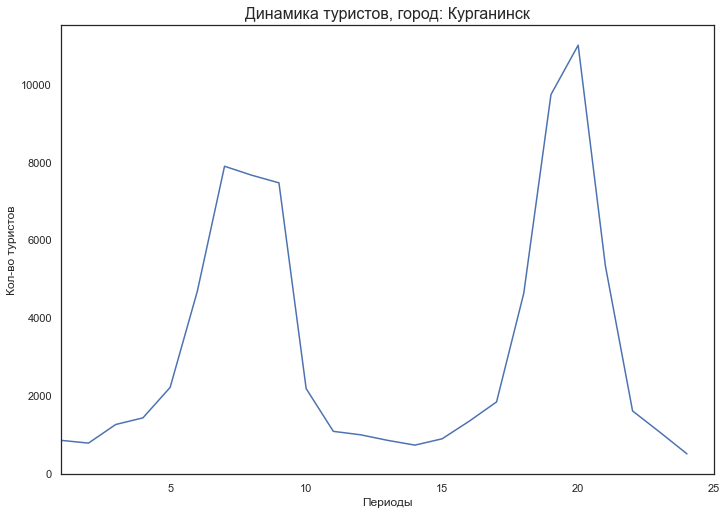

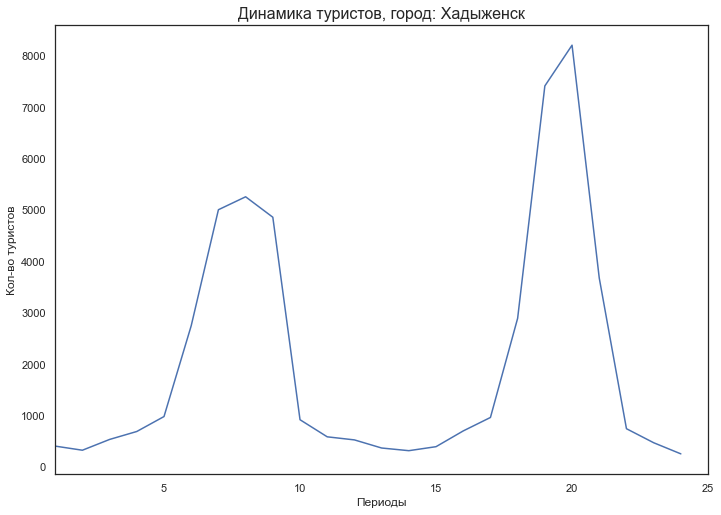

In [95]:
region_23 = ['Горячий Ключ', 'Кореновск', 'Туапсе', 'Славянск-на-Кубани', 'Крымск',
            'Армавир', 'Кропоткин', 'Новокубанск', 'Усть-Лабинск', 'Белореченск', 'Абинск', 'Гулькевичи', 'Курганинск',
            'Лабинск', 'Хадыженск']

for name in region_23_update:
    fig, ax = plt.subplots()
    sns.lineplot(x = df_all_cities[name]['period'], y = df_all_cities[name]['tourists'],
                     ax=ax)  
    ax.set_xlim(1,25)
    #ax.set_ylim(0,50000)
    plt.title('Динамика туристов, город: {}'.format(name), fontsize=16)
    #add axis labels
    plt.ylabel('Кол-во туристов')
    plt.xlabel('Периоды')
    plt.show()

# Республика Алтай, Иркутская область, Республика Карелия (меняй города)


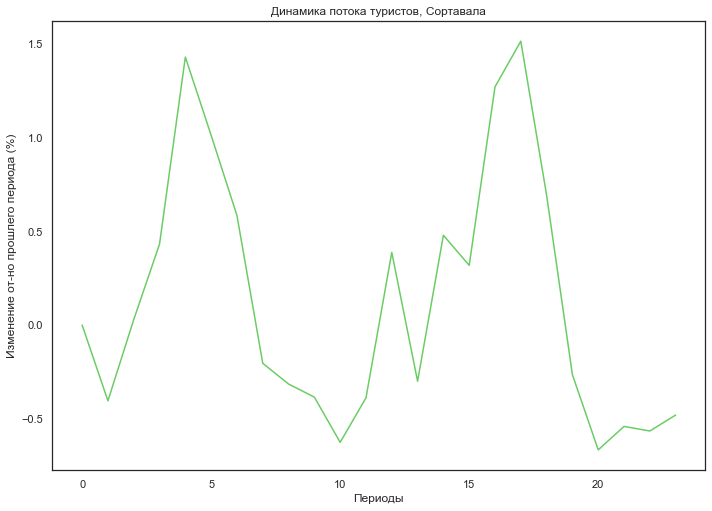

In [96]:
fig, ax = plt.subplots()
sns.lineplot(data=df_tourists_dynamics['Сортавала'], color = 'g')

plt.title('Динамика потока туристов, Сортавала')
#add axis labels
plt.ylabel('Изменение от-но прошлего периода (%)')
plt.xlabel('Периоды')
plt.show()

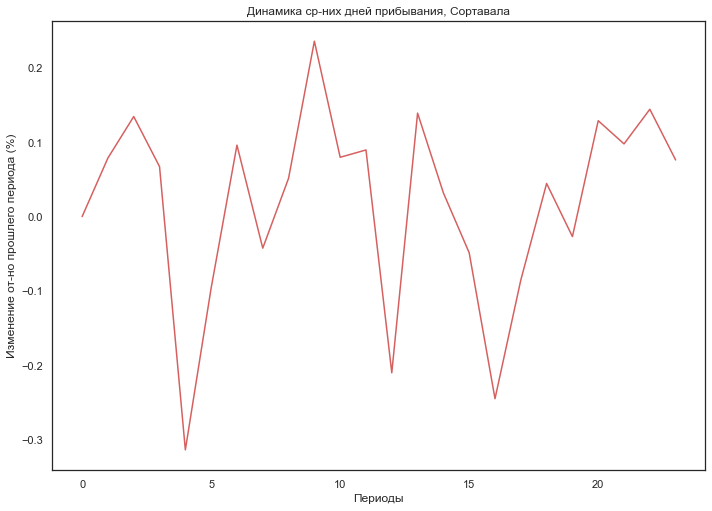

In [97]:
sns.lineplot(data=df_avgdays_dynamics['Сортавала'], color = 'r')

plt.title('Динамика ср-них дней прибывания, Сортавала')
#add axis labels
plt.ylabel('Изменение от-но прошлего периода (%)')
plt.xlabel('Периоды')
plt.show()

In [98]:
x1=df_all_cities['Горно-Алтайск']['tourists'].iloc[0:12].sum()
x2=df_all_cities['Горно-Алтайск']['tourists'].iloc[12:24].sum()

x1_summer=df_all_cities['Горно-Алтайск']['tourists'].iloc[5:8].sum()
x2_summer=df_all_cities['Горно-Алтайск']['tourists'].iloc[17:20].sum()

print("Total tourists:", df_all_cities['Горно-Алтайск']['tourists'].sum())
print("1st-year tourists:", x1, '|', "1st-year summer tourists:", x1_summer)
print("2nd-year tourists:", x2, '|', "2nd-year summer tourists:", x2_summer)
print("Absolute year change:", x2 - x1,'|', "Absolute summer season change:", x2_summer - x1_summer)
print("Relative year change:", round((((x2 - x1)/x1) * 100),2),"%",'|', "Relative summer season change:",
      round((((x2_summer - x1_summer)/x1_summer) * 100),2),"%")





Total tourists: 107472
1st-year tourists: 50739 | 1st-year summer tourists: 33696
2nd-year tourists: 56733 | 2nd-year summer tourists: 42783
Absolute year change: 5994 | Absolute summer season change: 9087
Relative year change: 11.81 % | Relative summer season change: 26.97 %


# Динамика Городов

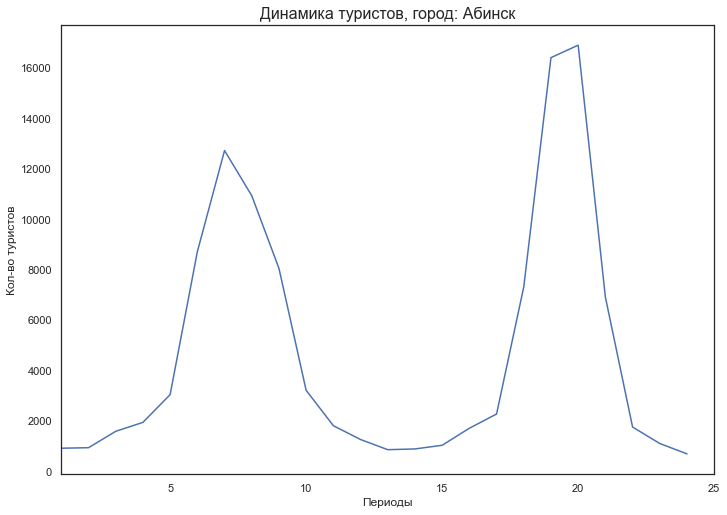

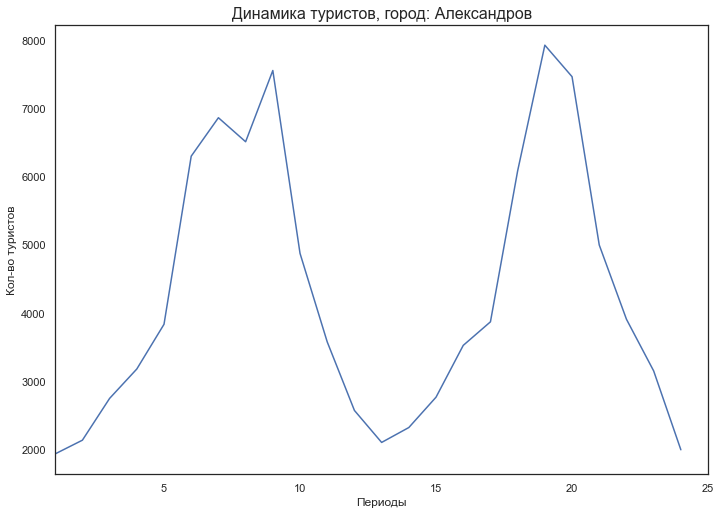

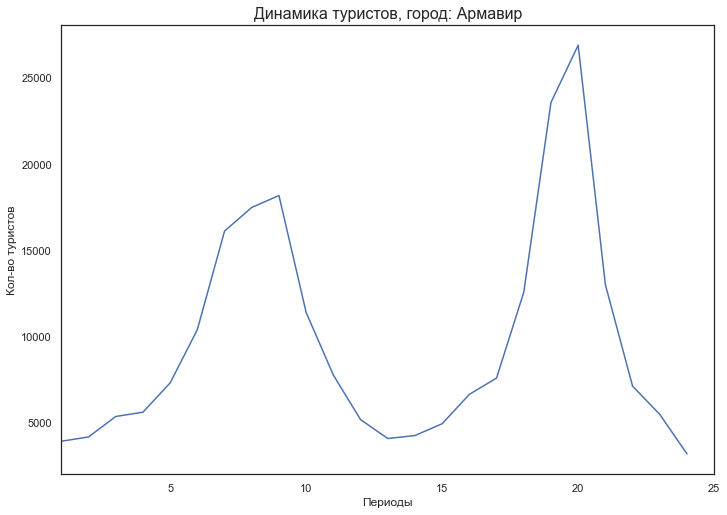

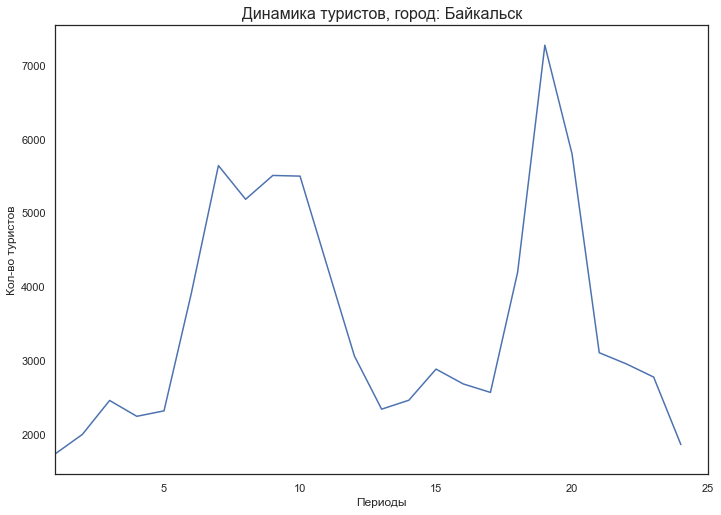

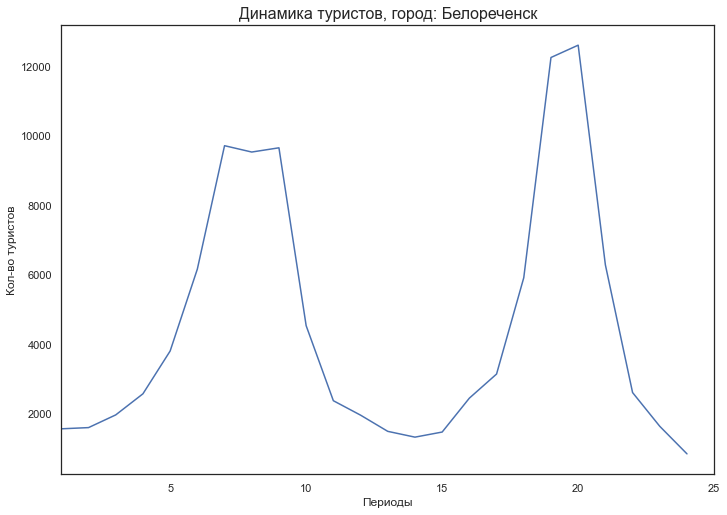

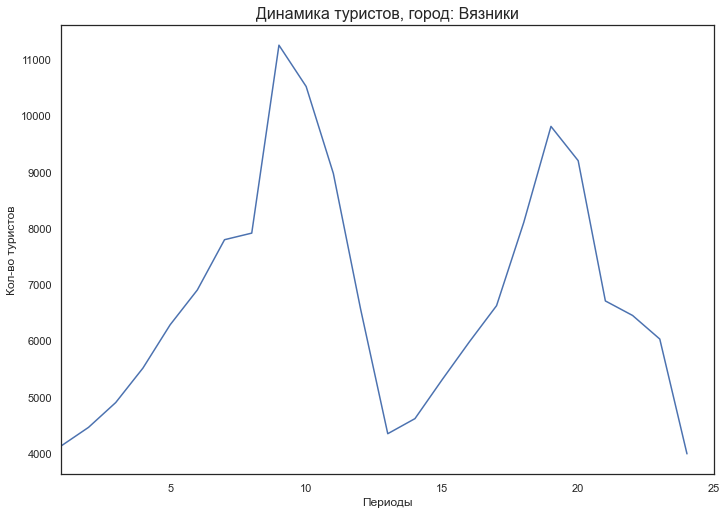

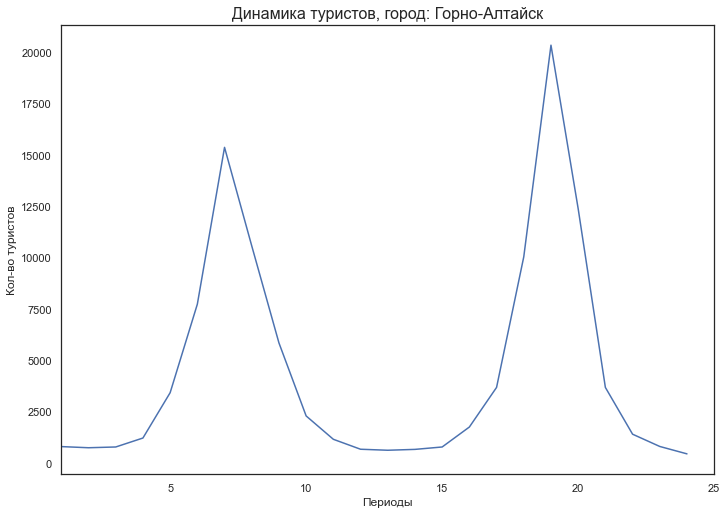

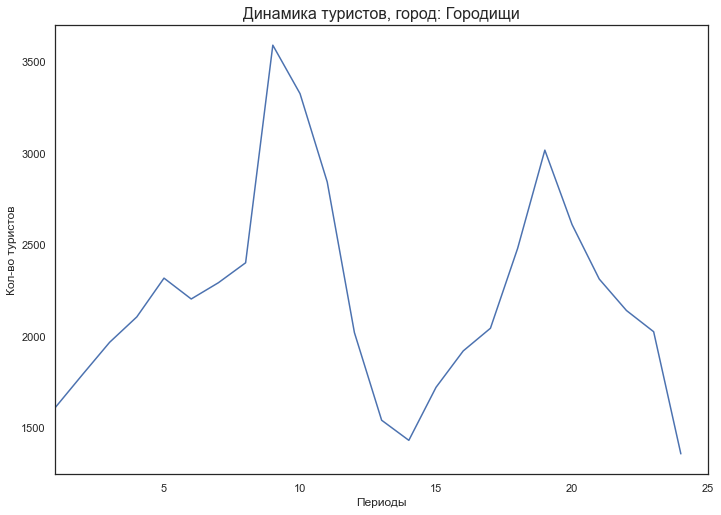

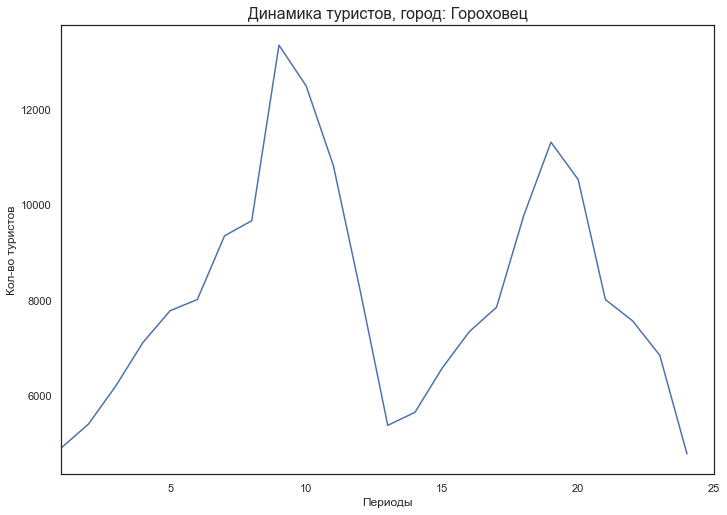

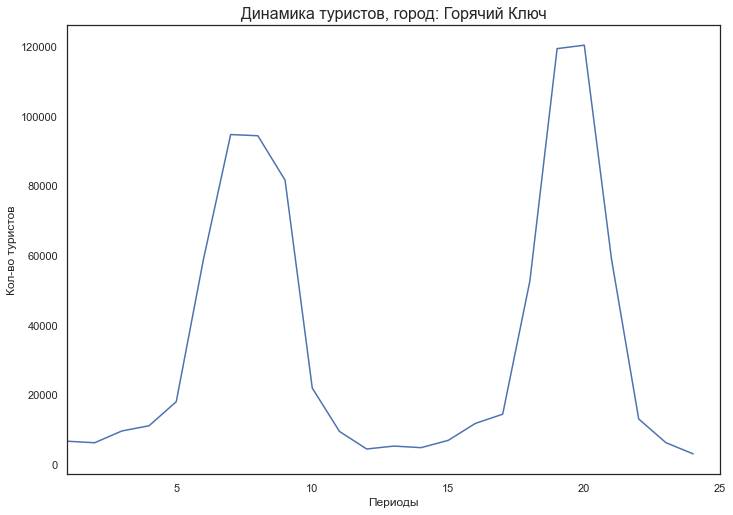

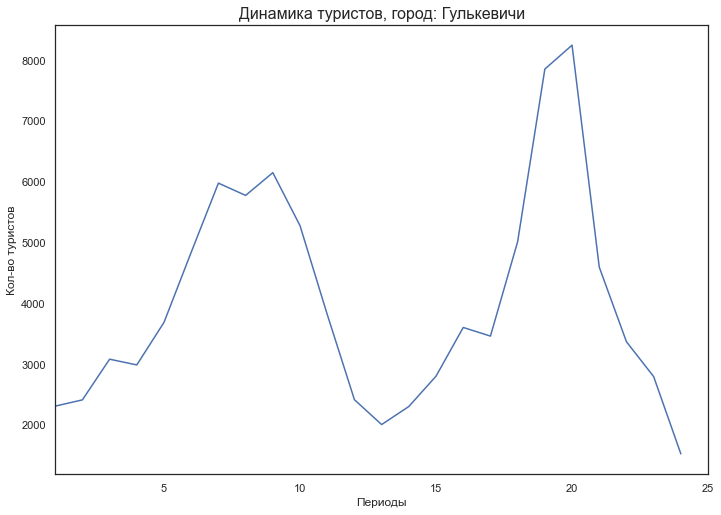

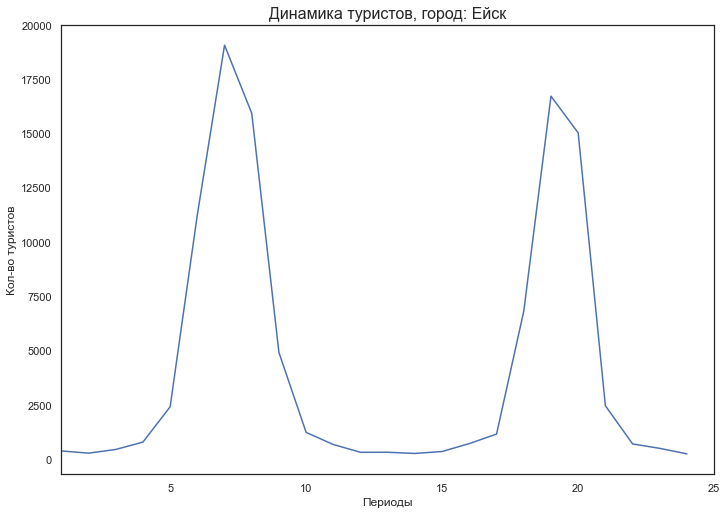

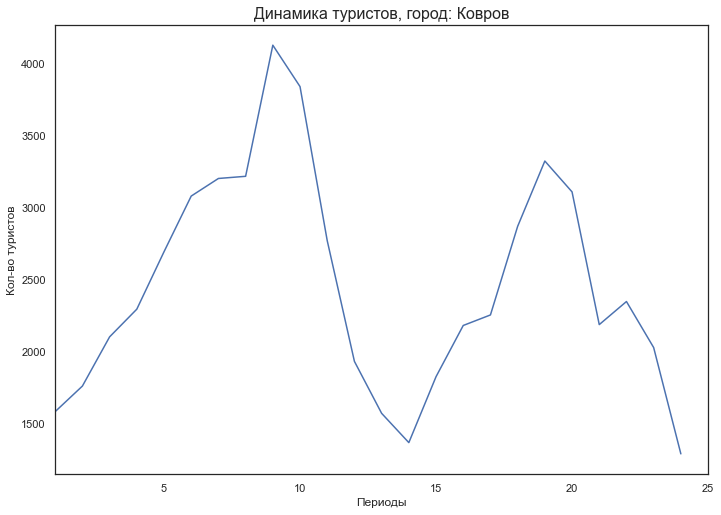

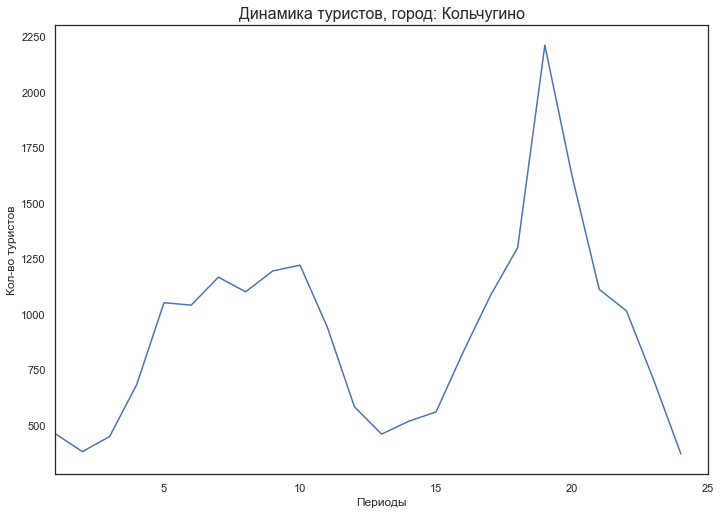

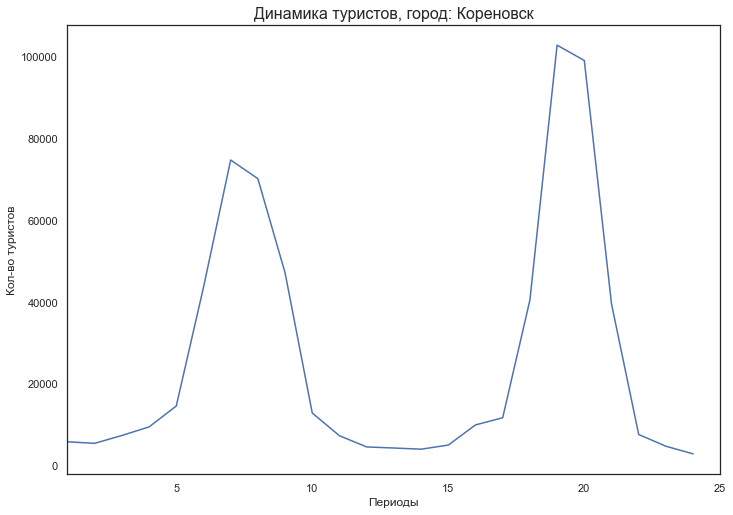

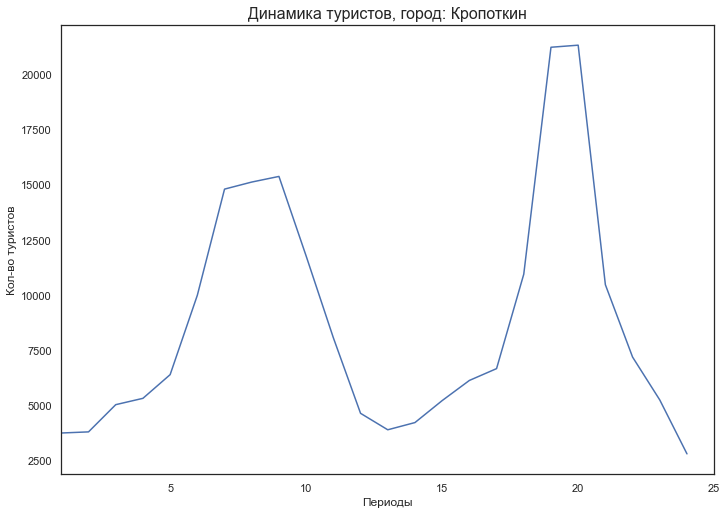

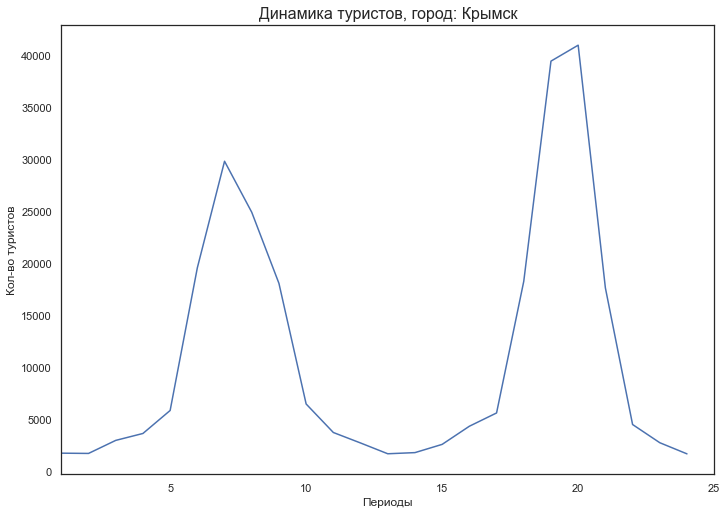

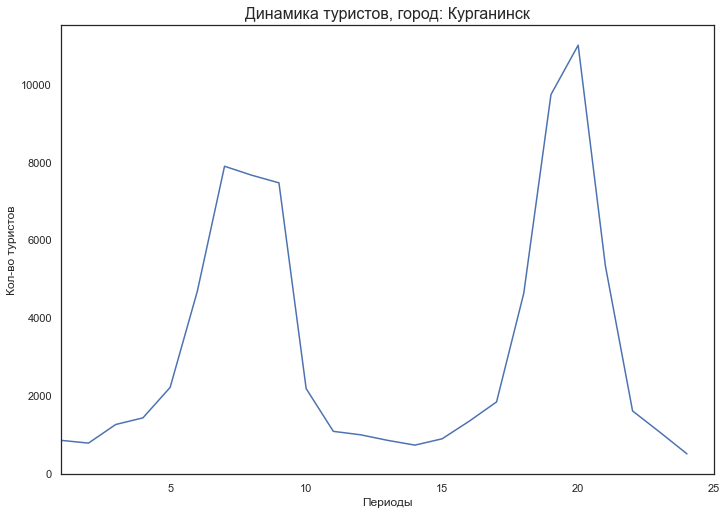

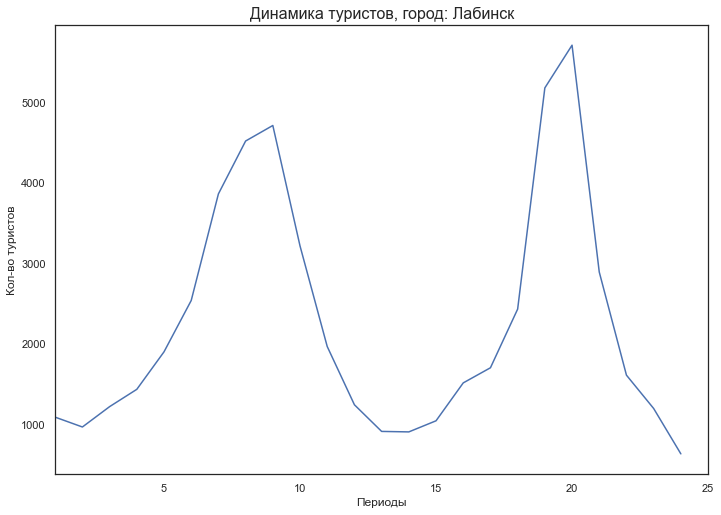

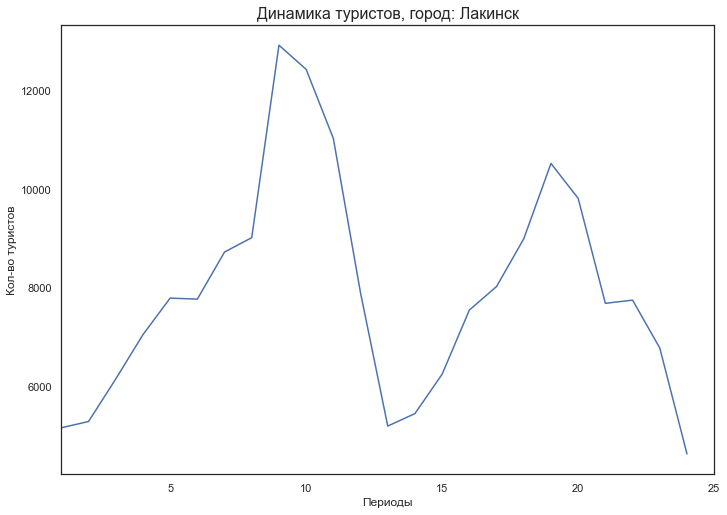

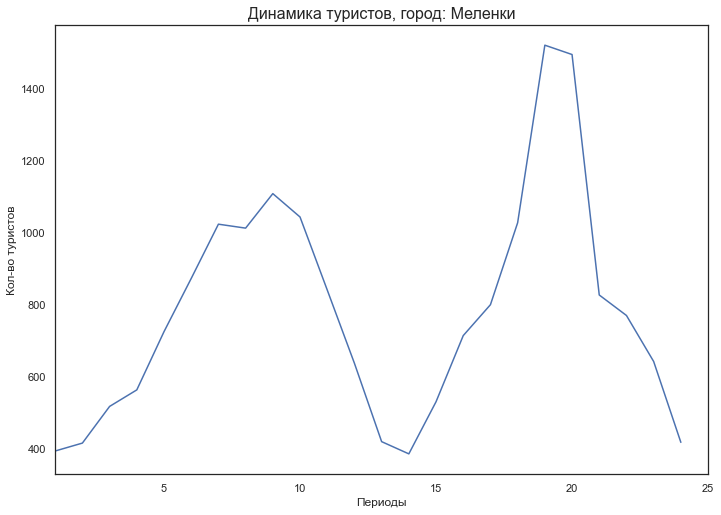

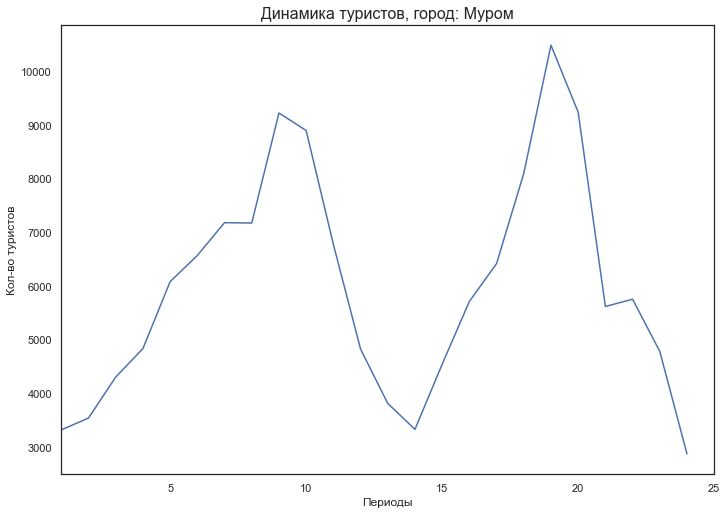

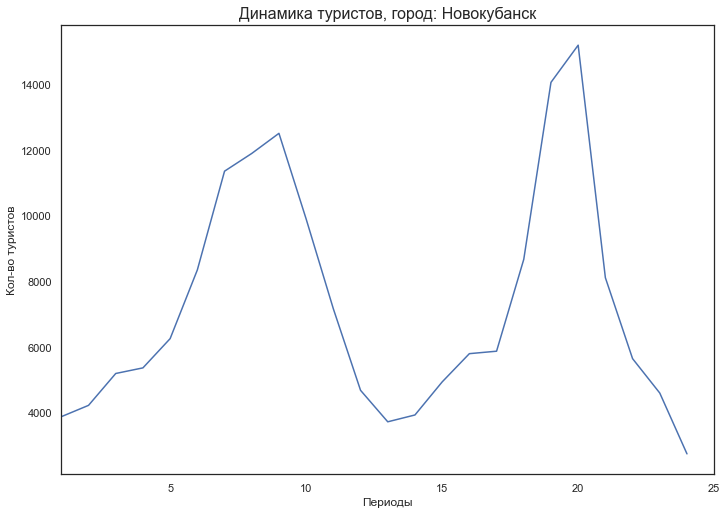

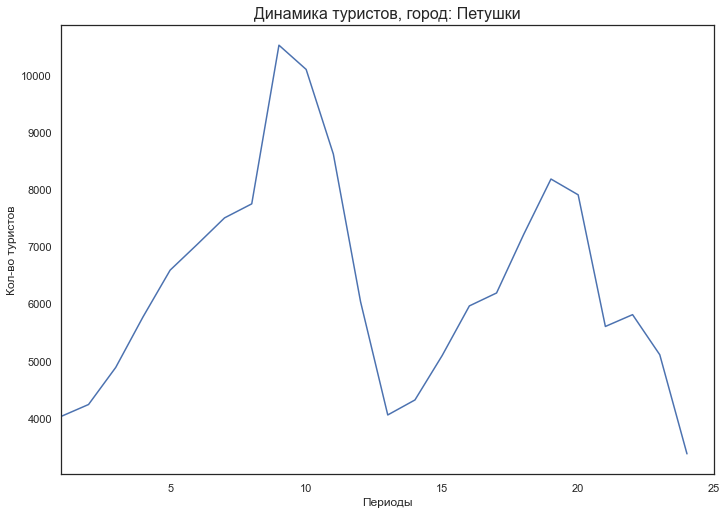

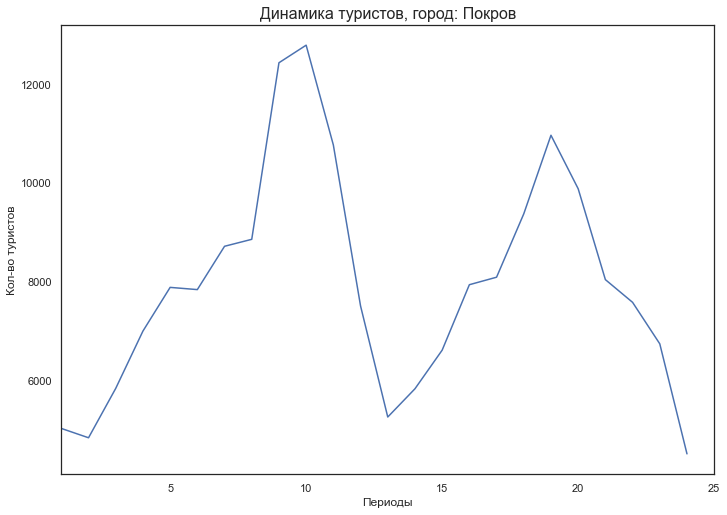

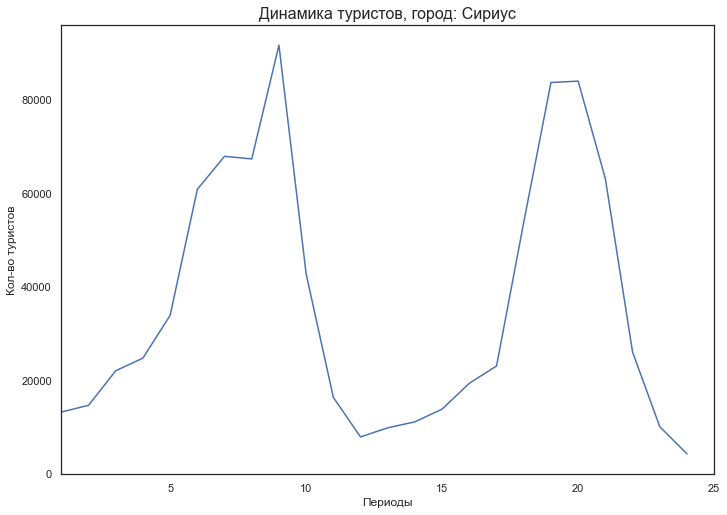

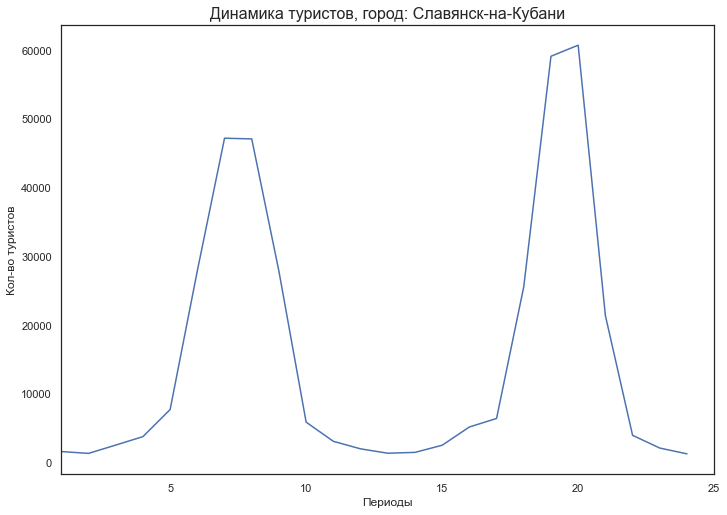

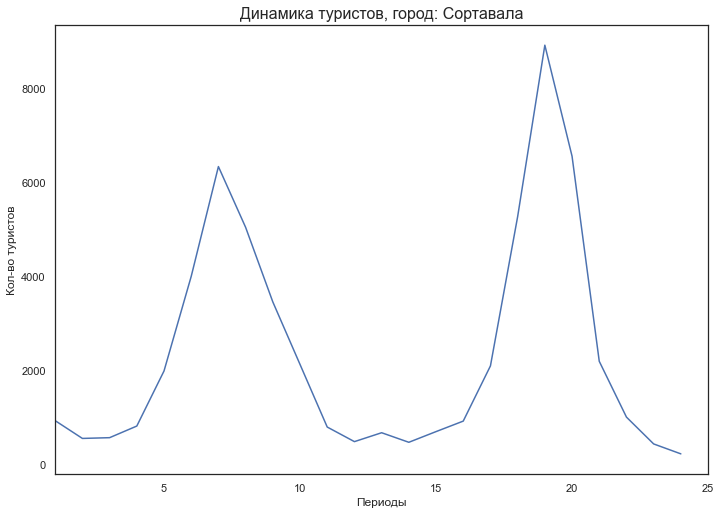

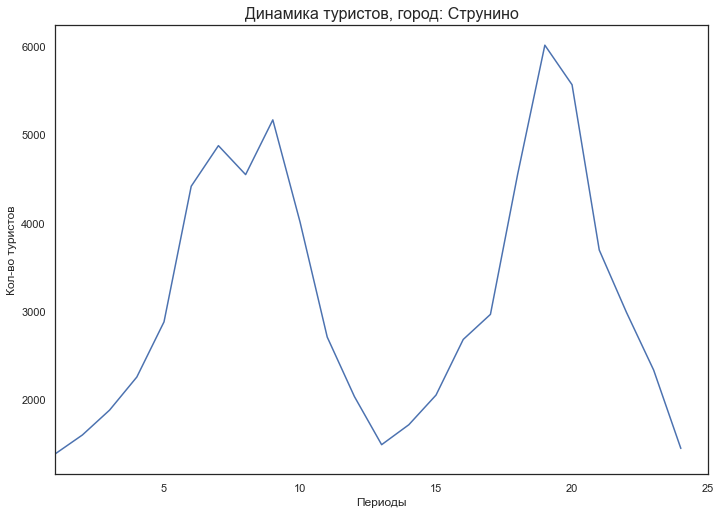

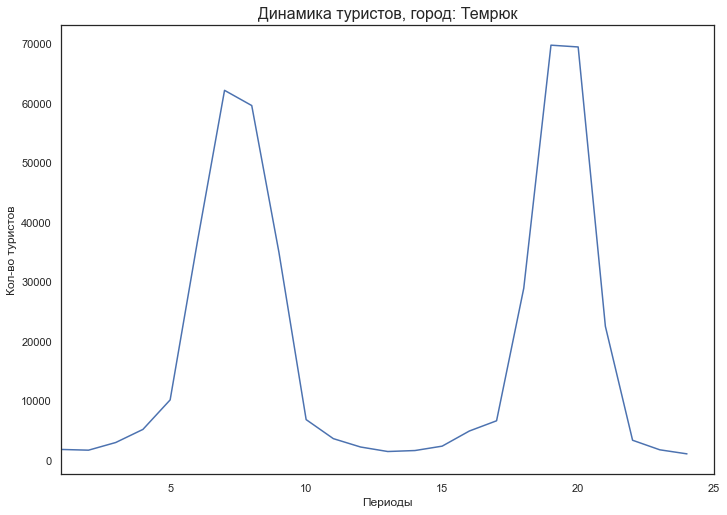

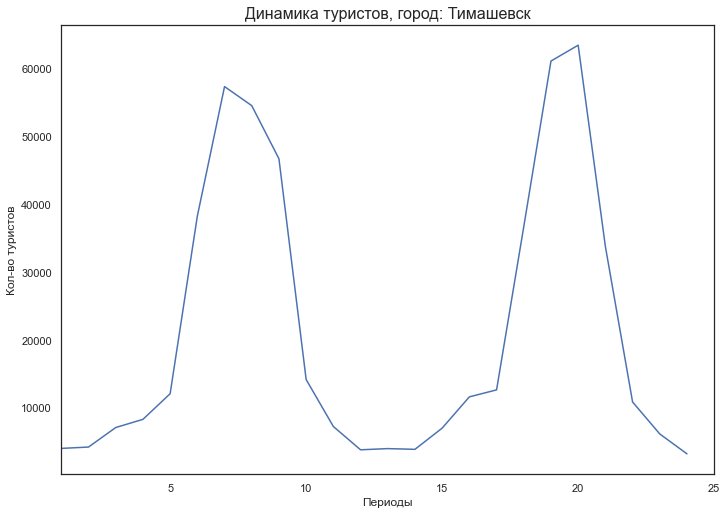

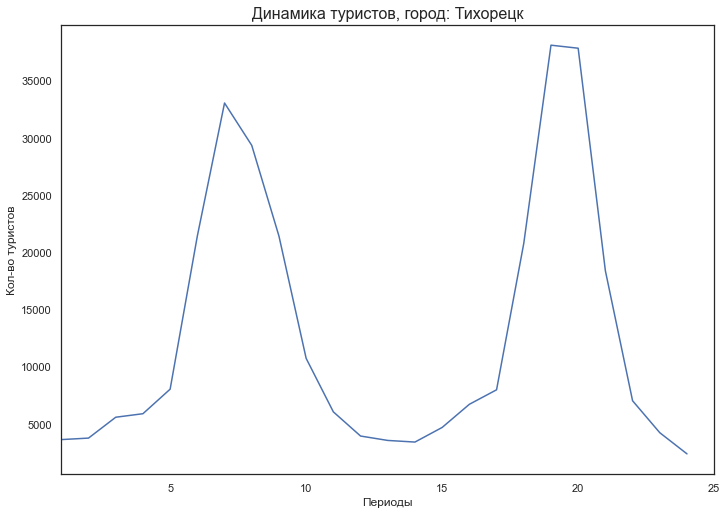

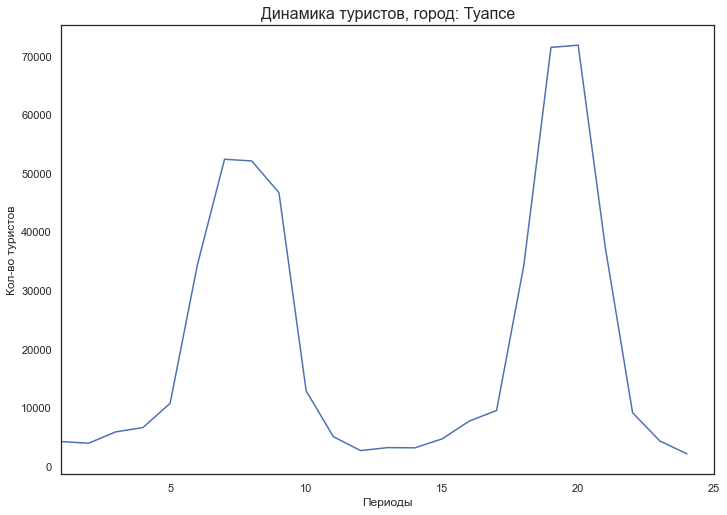

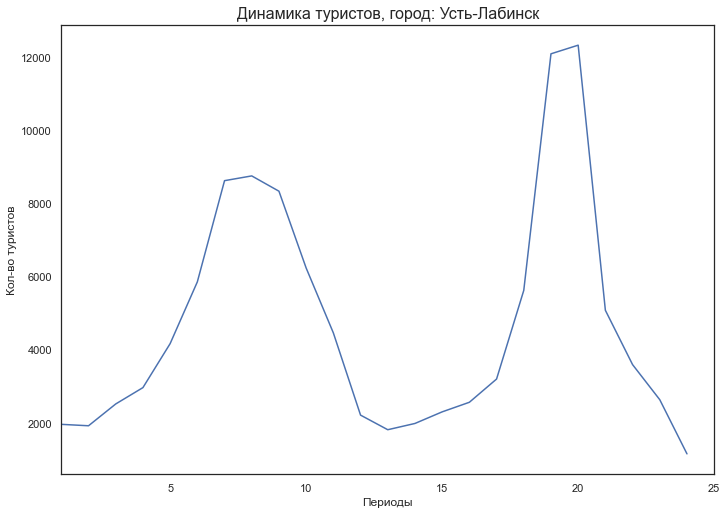

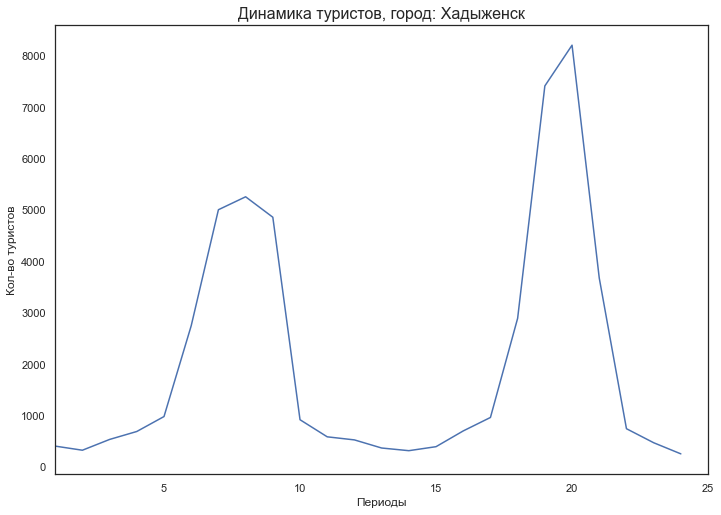

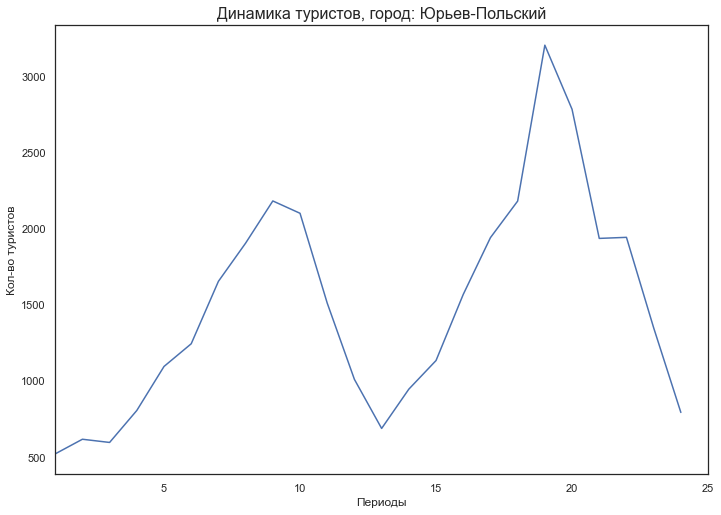

In [99]:
for name in list_cities:
    fig, ax = plt.subplots()
    sns.lineplot(x = df_all_cities[name]['period'], y = df_all_cities[name]['tourists'],
                     ax=ax)  
    ax.set_xlim(1,25)
    #ax.set_ylim(0,50000)
    plt.title('Динамика туристов, город: {}'.format(name), fontsize=16)
    #add axis labels
    plt.ylabel('Кол-во туристов')
    plt.xlabel('Периоды')
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


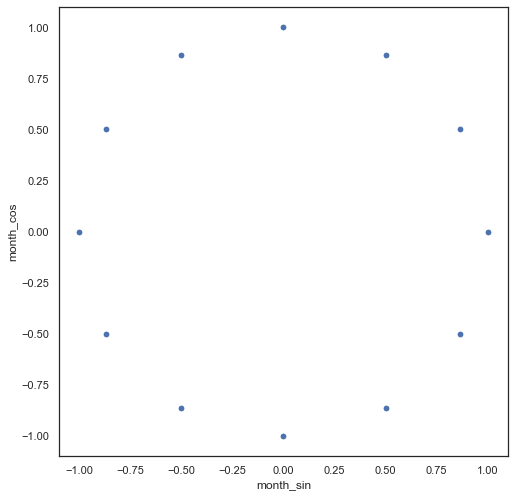

In [100]:
ax = df_all_cities['Абинск'].plot.scatter('month_sin', 'month_cos').set_aspect('equal')

In [101]:
train_Abinsk = df_all_cities['Абинск'].iloc[:20]
test_Abinsk = df_all_cities['Абинск'].iloc[20:]

In [102]:
df_model_abinsk = df_all_cities['Абинск'].drop(['period', 'tourists_uniq', 'city', 'month', 'mou_out', 'days_sum' ], axis=1)
df_model_abinsk['y'] = df_model_abinsk['tourists'].shift(-1)

In [103]:
df_model_abinsk

tourists  days_mean  gender_mean   age_mean         mou           dou  \
0        909   5.479648     1.374083  37.655053  500.171738  15159.056125   
1        930   5.969892     1.317365  38.183354  532.147228  14522.053833   
2       1580   6.042405     1.401283  37.562803  571.557338  16068.565333   
3       1935   5.487855     1.400339  37.549073  562.364754  15149.250414   
4       3035   5.739703     1.482430  37.134248  523.712894  15494.064487   
5       8704   7.081457     1.581492  35.797240  463.940015  13936.994518   
6      12719   6.984590     1.583007  36.095410  450.335384  15632.135002   
7      10928   6.491124     1.474436  37.099340  448.869680  14950.742429   
8       8045   5.850715     1.463916  38.653821  464.819928  13562.505716   
9       3206   5.595446     1.418287  37.622239  516.491440  15879.423496   
10      1803   5.464781     1.308611  36.822764  531.949522  19067.006092   
11      1254   4.642743     1.220074  36.811015  574.526176  17930.364958   
12       851   4.824912     1.339820  36.414487  470.513207  17323.685661   
13       880   5.218182     1.305516  36.612499  506.425535  16927.004366   
14      1026   5.775828     1.370647  36.328686  537.438556  18405.570205   
15      1702   5.902468     1.422369  37.048795  509.314057  16352.222303   
16      2266   5.954545     1.432058  37.139848  470.690736  15739.805260   
17      7309   7.057463     1.529819  36.346598  440.751887  14684.693060   
18     16404   7.027798     1.499745  36.112483  437.869984  16887.112865   
19     16898   6.644810     1.500992  36.388464  447.786097  16938.459716   
20      6905   6.352933     1.443878  36.760697  435.774337  14408.261759   
21      1749   6.440823     1.380381  36.135325  468.351714  17068.469849   
22      1096   6.083942     1.317661  35.958401  454.477942  18438.420581   
23       685   5.159124     1.208633  34.686876  501.319826  19831.799722   

    period12     month_sin     month_cos        y  
0          1  5.000000e-01  8.660254e-01    930.0  
1          2  8.660254e-01  5.000000e-01   1580.0  
2          3  1.000000e+00  6.123234e-17   1935.0  
3          4  8.660254e-01 -5.000000e-01   3035.0  
4          5  5.000000e-01 -8.660254e-01   8704.0  
5          6  1.224647e-16 -1.000000e+00  12719.0  
6          7 -5.000000e-01 -8.660254e-01  10928.0  
7          8 -8.660254e-01 -5.000000e-01   8045.0  
8          9 -1.000000e+00 -1.836970e-16   3206.0  
9         10 -8.660254e-01  5.000000e-01   1803.0  
10        11 -5.000000e-01  8.660254e-01   1254.0  
11        12 -2.449294e-16  1.000000e+00    851.0  
12         1  5.000000e-01  8.660254e-01    880.0  
13         2  8.660254e-01  5.000000e-01   1026.0  
14         3  1.000000e+00  6.123234e-17   1702.0  
15         4  8.660254e-01 -5.000000e-01   2266.0  
16         5  5.000000e-01 -8.660254e-01   7309.0  
17         6  1.224647e-16 -1.000000e+00  16404.0  
18         7 -5.000000e-01 -8.660254e-01  16898.0  
19         8 -8.660254e-01 -5.000000e-01   6905.0  
20         9 -1.000000e+00 -1.836970e-16   1749.0  
21        10 -8.660254e-01  5.000000e-01   1096.0  
22        11 -5.000000e-01  8.660254e-01    685.0  
23        12 -2.449294e-16  1.000000e+00      NaN

In [104]:
train_Abinsk = df_model_abinsk.iloc[:20]
test_Abinsk = df_model_abinsk.iloc[20:]
test_Abinsk = test_Abinsk.drop(test_Abinsk.tail(1).index)


In [105]:
df_trends_abinsk = pd.read_csv('multiTimeline.csv')
df_trends_abinsk

Категория: Все категории
Неделя             абинск: (Россия)
2018-04-08                       44
2018-04-15                       60
2018-04-22                       54
2018-04-29                       69
...                             ...
2023-02-26                       72
2023-03-05                       56
2023-03-12                       69
2023-03-19                       72
2023-03-26                       81

[261 rows x 1 columns]

In [106]:
train_Abinsk

tourists  days_mean  gender_mean   age_mean         mou           dou  \
0        909   5.479648     1.374083  37.655053  500.171738  15159.056125   
1        930   5.969892     1.317365  38.183354  532.147228  14522.053833   
2       1580   6.042405     1.401283  37.562803  571.557338  16068.565333   
3       1935   5.487855     1.400339  37.549073  562.364754  15149.250414   
4       3035   5.739703     1.482430  37.134248  523.712894  15494.064487   
5       8704   7.081457     1.581492  35.797240  463.940015  13936.994518   
6      12719   6.984590     1.583007  36.095410  450.335384  15632.135002   
7      10928   6.491124     1.474436  37.099340  448.869680  14950.742429   
8       8045   5.850715     1.463916  38.653821  464.819928  13562.505716   
9       3206   5.595446     1.418287  37.622239  516.491440  15879.423496   
10      1803   5.464781     1.308611  36.822764  531.949522  19067.006092   
11      1254   4.642743     1.220074  36.811015  574.526176  17930.364958   
12       851   4.824912     1.339820  36.414487  470.513207  17323.685661   
13       880   5.218182     1.305516  36.612499  506.425535  16927.004366   
14      1026   5.775828     1.370647  36.328686  537.438556  18405.570205   
15      1702   5.902468     1.422369  37.048795  509.314057  16352.222303   
16      2266   5.954545     1.432058  37.139848  470.690736  15739.805260   
17      7309   7.057463     1.529819  36.346598  440.751887  14684.693060   
18     16404   7.027798     1.499745  36.112483  437.869984  16887.112865   
19     16898   6.644810     1.500992  36.388464  447.786097  16938.459716   

    period12     month_sin     month_cos        y  
0          1  5.000000e-01  8.660254e-01    930.0  
1          2  8.660254e-01  5.000000e-01   1580.0  
2          3  1.000000e+00  6.123234e-17   1935.0  
3          4  8.660254e-01 -5.000000e-01   3035.0  
4          5  5.000000e-01 -8.660254e-01   8704.0  
5          6  1.224647e-16 -1.000000e+00  12719.0  
6          7 -5.000000e-01 -8.660254e-01  10928.0  
7          8 -8.660254e-01 -5.000000e-01   8045.0  
8          9 -1.000000e+00 -1.836970e-16   3206.0  
9         10 -8.660254e-01  5.000000e-01   1803.0  
10        11 -5.000000e-01  8.660254e-01   1254.0  
11        12 -2.449294e-16  1.000000e+00    851.0  
12         1  5.000000e-01  8.660254e-01    880.0  
13         2  8.660254e-01  5.000000e-01   1026.0  
14         3  1.000000e+00  6.123234e-17   1702.0  
15         4  8.660254e-01 -5.000000e-01   2266.0  
16         5  5.000000e-01 -8.660254e-01   7309.0  
17         6  1.224647e-16 -1.000000e+00  16404.0  
18         7 -5.000000e-01 -8.660254e-01  16898.0  
19         8 -8.660254e-01 -5.000000e-01   6905.0

In [107]:
print(

SyntaxError: unexpected EOF while parsing (149104261.py, line 1)

In [ ]:
#['tourists', 'days_mean', 'gender_mean', 'age_mean', 'mou', 'dou', 'month_sin', 'month_cos']
from sklearn.tree import DecisionTreeRegressor
X_train = train_Abinsk['tourists'].values.reshape(-1,1)
y_train = train_Abinsk['y'].values.reshape(-1,1)
X_test = test_Abinsk['tourists'].values.reshape(-1,1)
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_reg.fit(X=X_train, y=y_train)
# Make predictions
dt_pred = dt_reg.predict(X_test)
# Assign predictions to a new column in test
test_Abinsk['dt_pred'] = dt_pred

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
test_Abinsk['gbr_pred'] = gbr_pred

In [ ]:
test_Abinsk

In [ ]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)